In [50]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from xgboost import XGBClassifier
import eli5
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
#read the data
df = pd.read_csv('winequality-red.csv')

In [5]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

(12.0, 0.0)

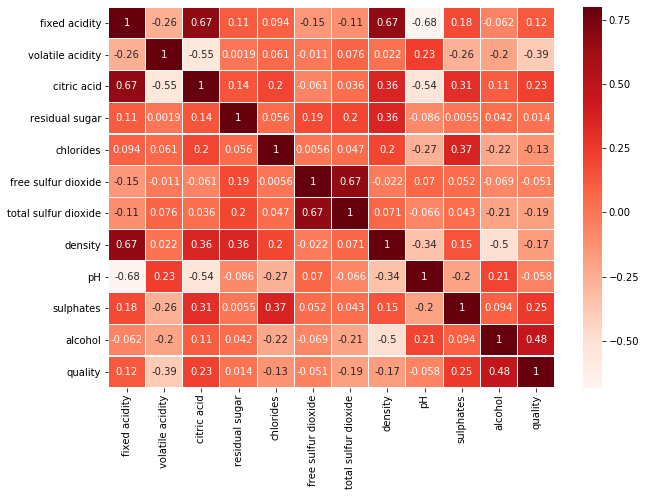

In [6]:
#get a correlation heatmap of the data
corrmatrix = df.corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corrmatrix, annot=True, linewidths=0.1, cmap='Reds', vmax=0.8)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [27]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
#convert the targer variable to string
df['quality'] = df['quality'].astype(str)

In [8]:
#split the data into training and test sets
Y = df.pop('quality')
X = df
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2)

In [56]:
# Random Forest Classifier

In [9]:
# build and train a random forest model
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.33      0.07      0.12        14
           5       0.73      0.82      0.77       130
           6       0.65      0.73      0.69       128
           7       0.59      0.40      0.48        42
           8       0.00      0.00      0.00         3

    accuracy                           0.68       320
   macro avg       0.38      0.34      0.34       320
weighted avg       0.65      0.68      0.66       320



/Users/rohanvartak/anaconda3/envs/fds/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/rohanvartak/anaconda3/envs/fds/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
#check the feature importance of the model
eli5.show_weights(rf, feature_names=list(xtrain.columns))

In [10]:
#import the partial dependence library
import partial_dependence as pdp_plot

In [11]:
#make a list of columns
mycols = list(xtest.columns)

In [12]:
#make a list of class labels
class_label = list(rf.classes_)

In [13]:
class_label[0]

'3'

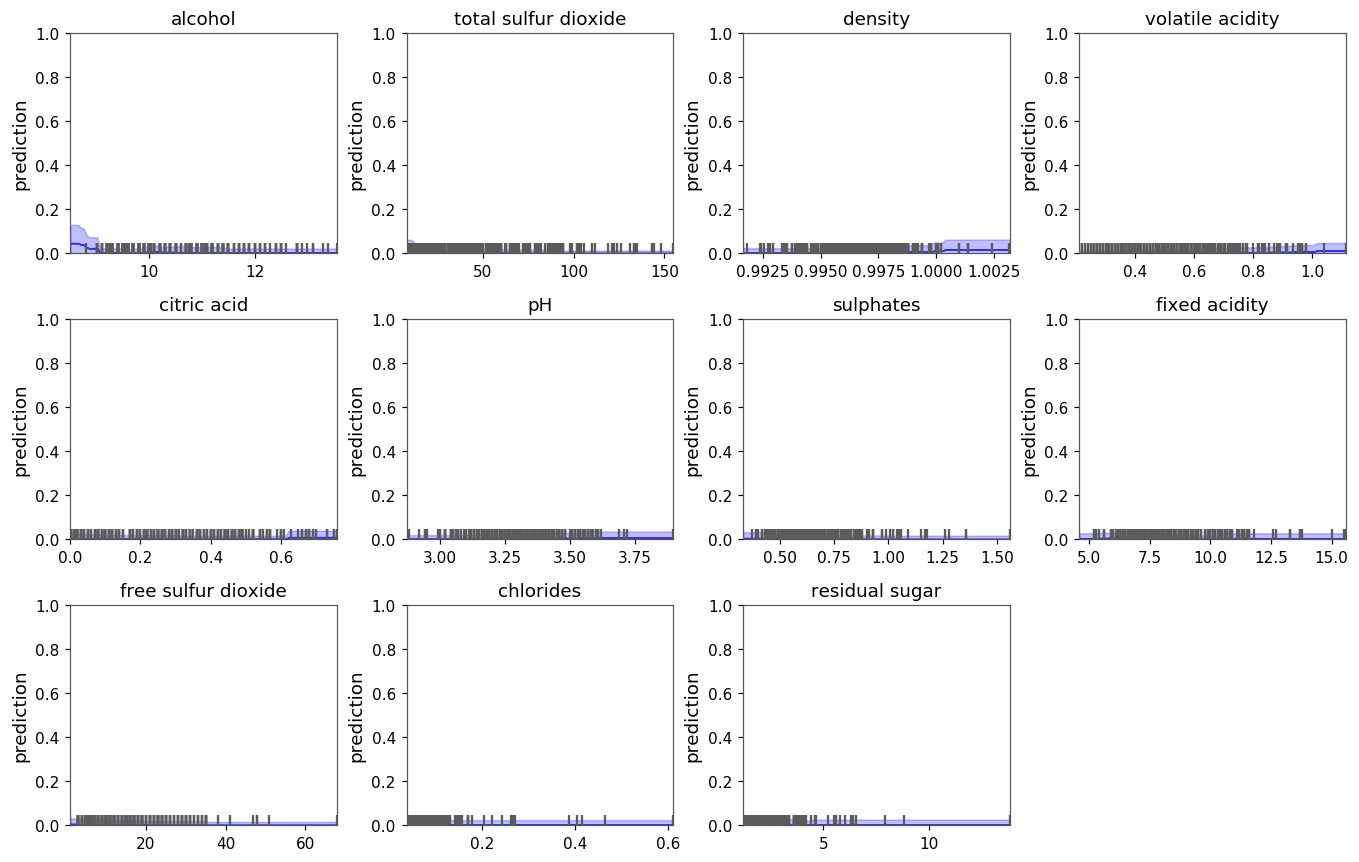

In [14]:
pdp1 = pdp_plot.PartialDependence(xtest, rf, class_label, class_label[0])
pdp1.plot_multiple(mycols, rug=True, data=xtest)

In [18]:
#since the model does not classify this label, its partial dependence is almost zero for all the variables. This is because
# the number of instances of the label 3 is very small

In [16]:
class_label[1]

'4'

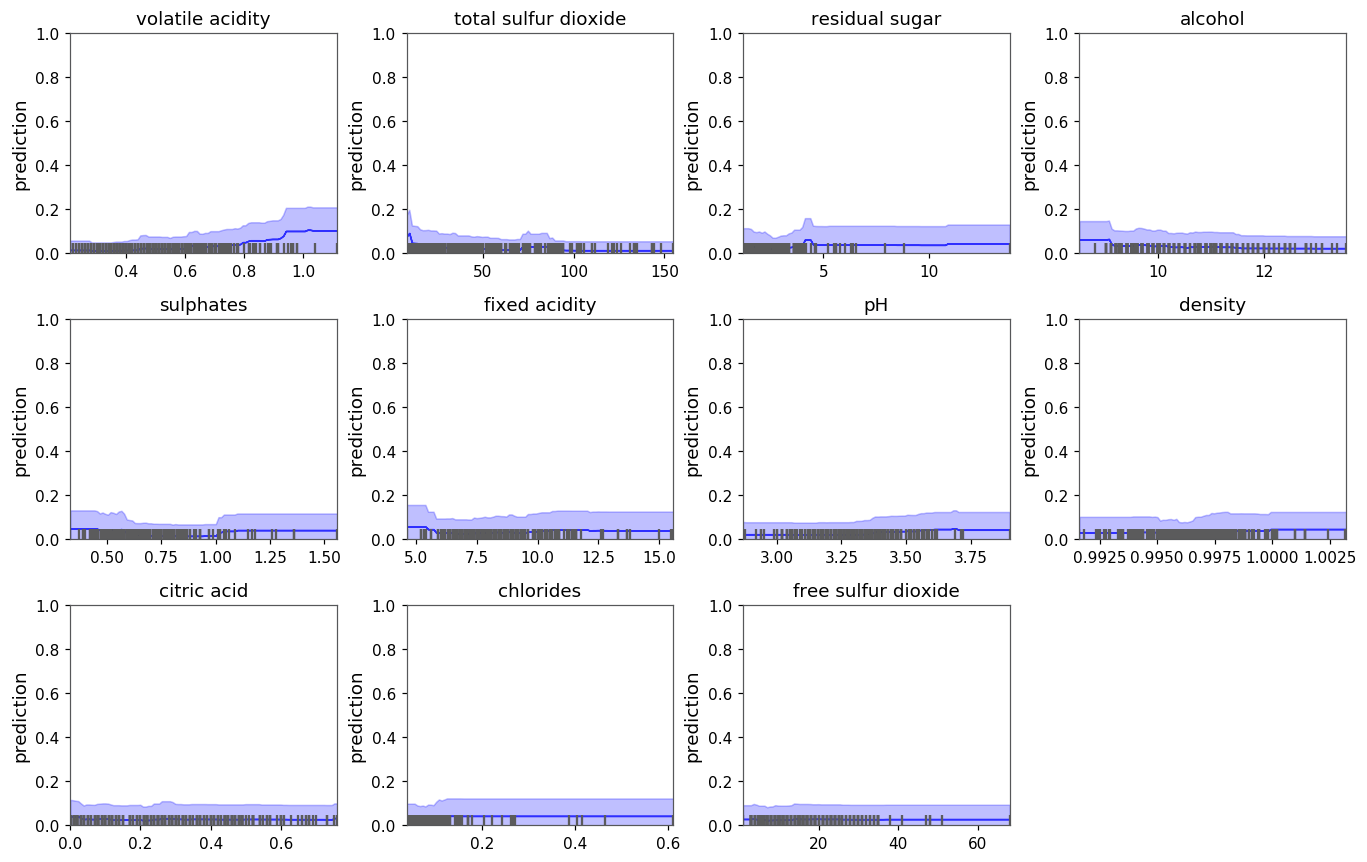

In [17]:
pdp1 = pdp_plot.PartialDependence(xtest, rf, class_label, class_label[1])
pdp1.plot_multiple(mycols, rug=True, data=xtest)

In [19]:
#same is the case with quality 4 where the model is not able to recognize the label since it does not have many instances.

In [25]:
class_label[2]

'5'

In [26]:
# The maximum number of instances are of label 5

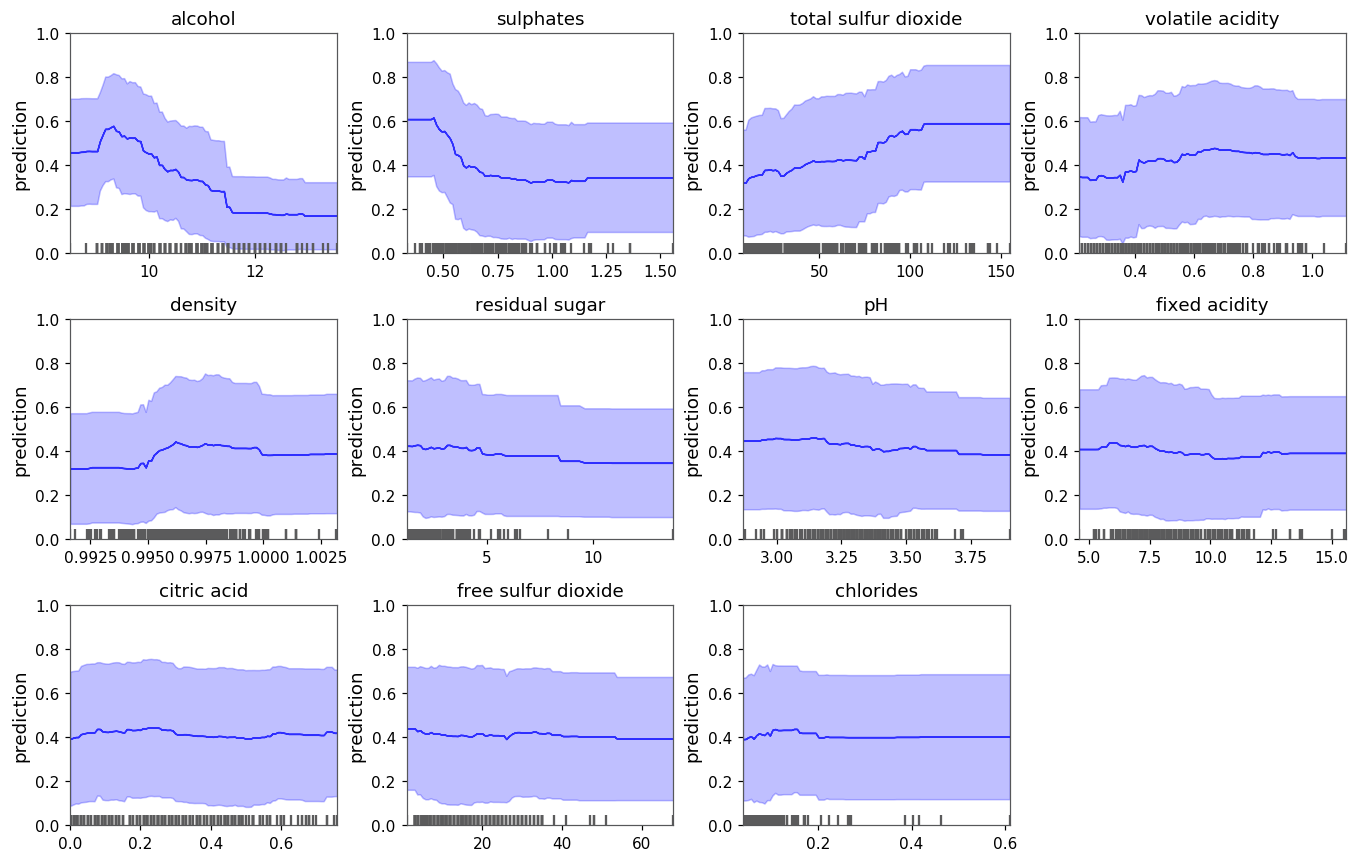

In [27]:
pdp2 = pdp_plot.PartialDependence(xtest, rf, class_label, class_label[2])
pdp2.plot_multiple(mycols, rug=True, data=xtest)

In [30]:
#In the above plot we see that, the probabilty of prediction is some what constant for free sulfur dioxide, fixed acidity
# chlorides, pH and citric acid. 
# The prediction probability decreases as we increase the value of alcohol. Same is the case for sulphates.
# On the other hand we see that for total sulfur doxide the probability of prediction increases as the values of total sulfur
#dioxide increases. Same is for volatile acidity and sensity

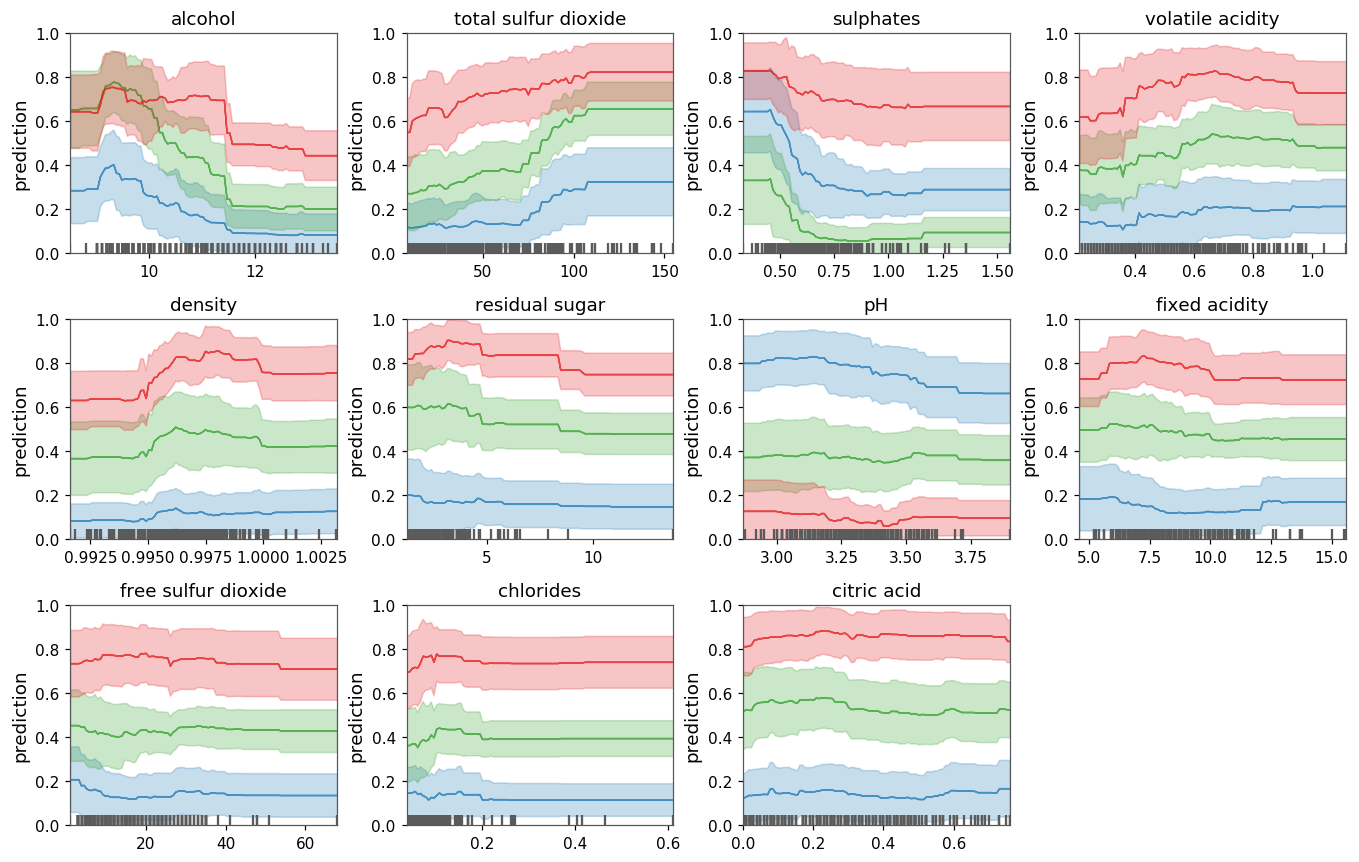

In [29]:
#clustering the curves
pdp2.plot_multiple(mycols, rug=True, data=xtest, compute_clusters=True, n_clusters=3)

In [31]:
# The prediction probability is decreasing for residual sugar till the part where the maximum instances of residual suagr
#are present. Then it becomes constant.

In [34]:
#checking for class 6

In [32]:
class_label[3]

'6'

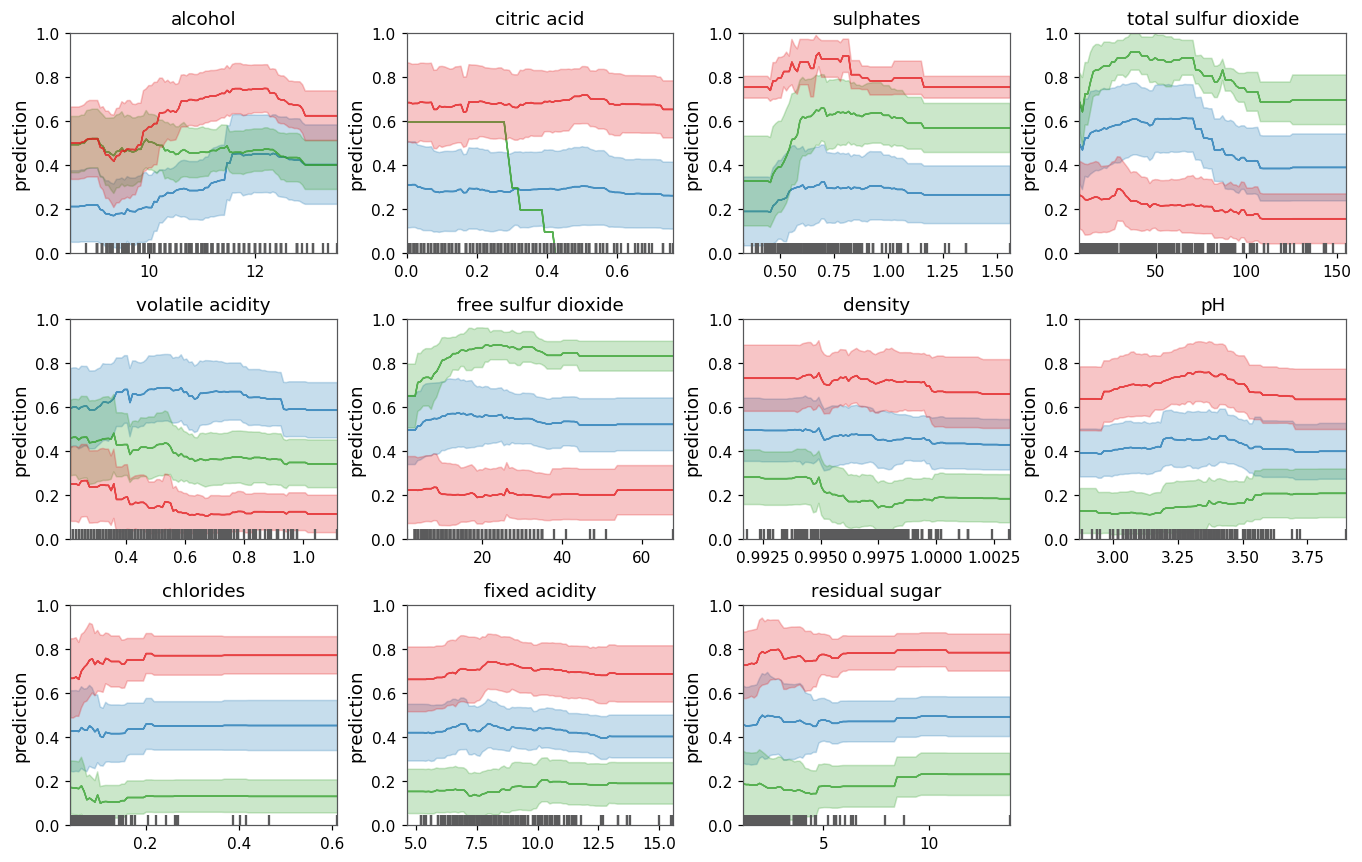

In [33]:
pdp3 = pdp_plot.PartialDependence(xtest, rf, class_label, class_label[3])
pdp3.plot_multiple(mycols, rug=True, data=xtest, compute_clusters=True, n_clusters=3)

In [36]:
#Here we see opposite of what the pdps are for class 5, as the value of the alcohol increases the prediction probabilty 
#increases. Same is the case with sulphates. On the constrast the value is decreasing for volatile acidity and 
#total sulfur dioxide

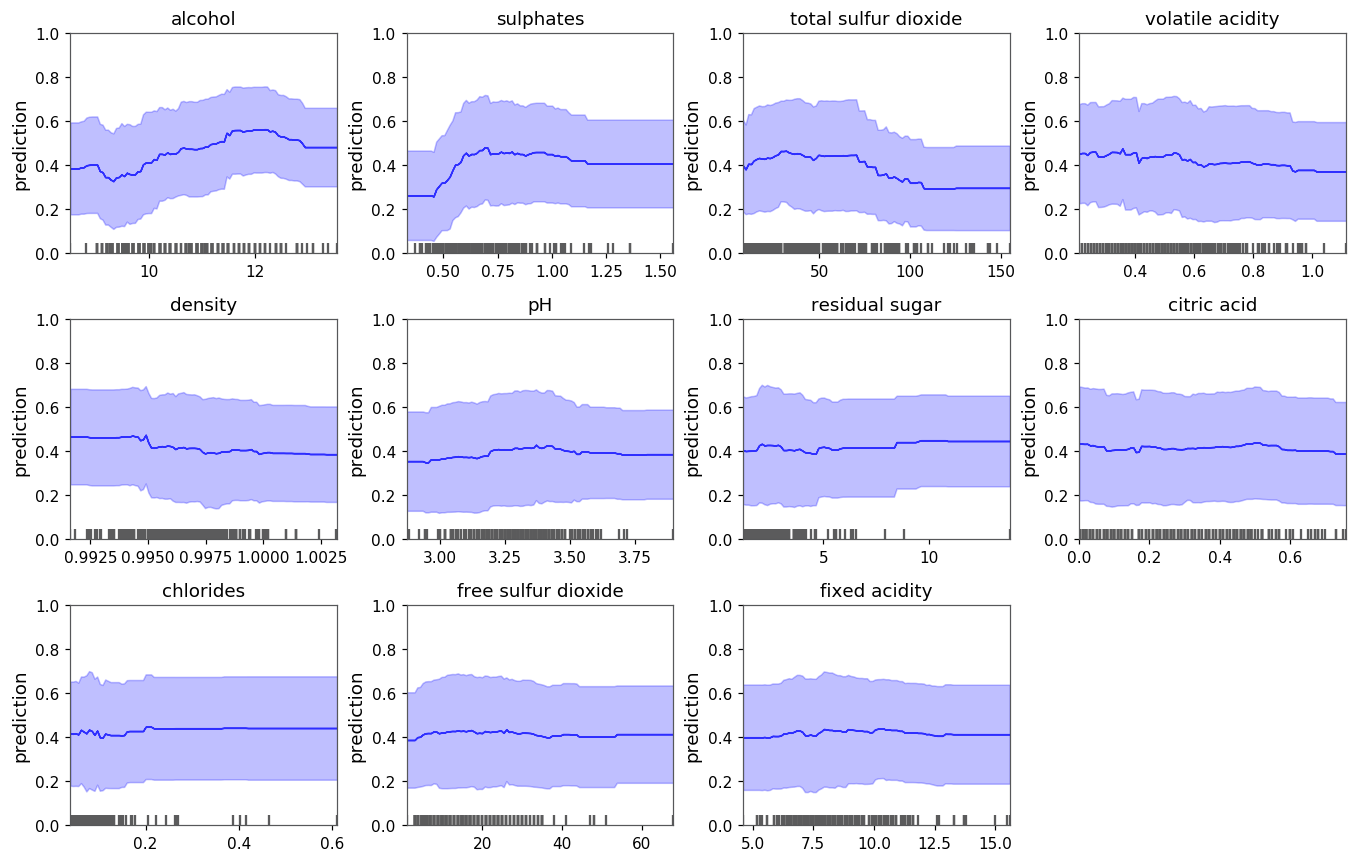

In [35]:
pdp3.plot_multiple(mycols, rug=True, data=xtest)

In [37]:
# for label 7

In [38]:
class_label[4]

'7'

In [41]:
#there are not many labels of class 7

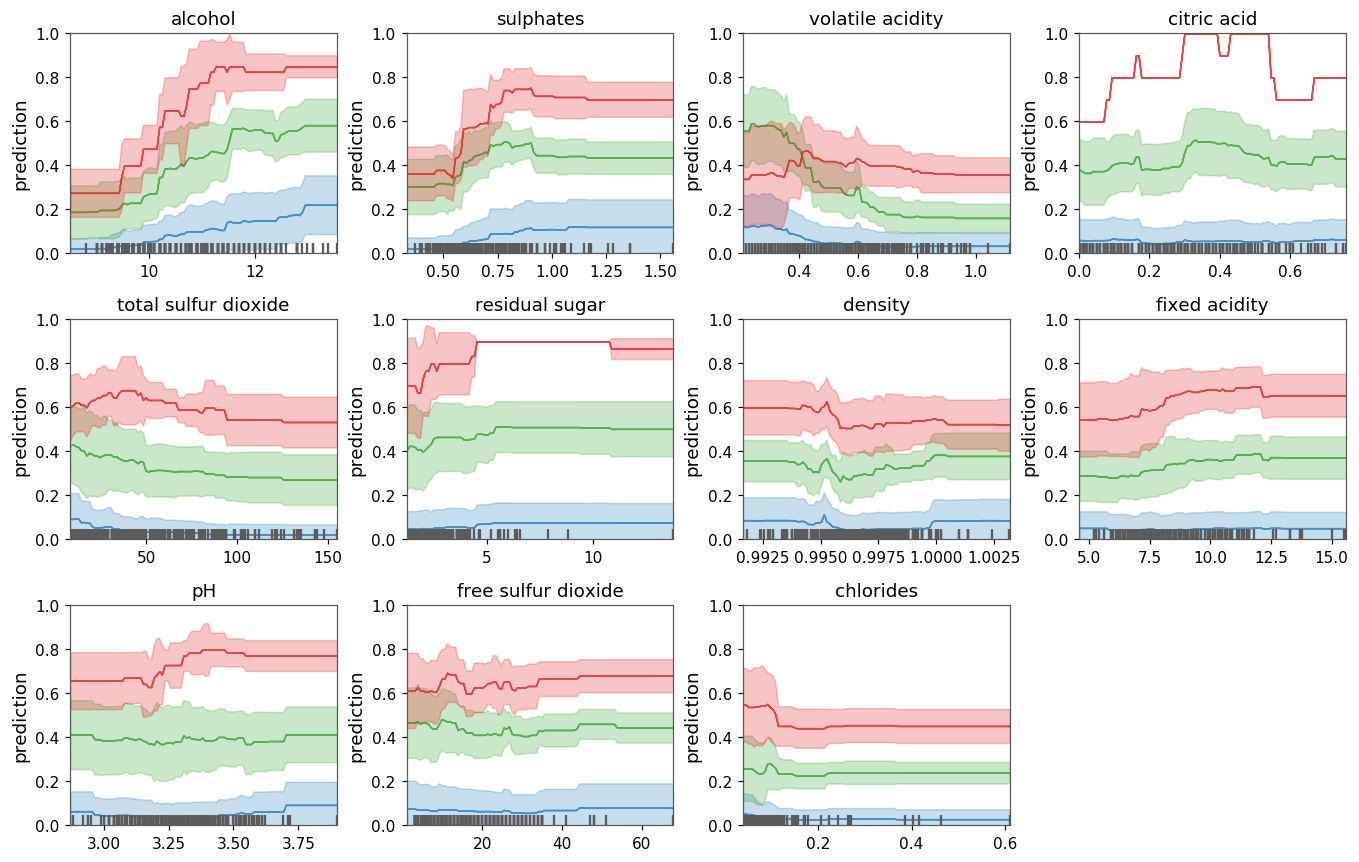

In [39]:
pdp4 = pdp_plot.PartialDependence(xtest, rf, class_label, class_label[4])
pdp4.plot_multiple(mycols, rug=True, data=xtest, compute_clusters=True, n_clusters=3)

In [42]:
#Here we see the same pattern as label 5 where the prediction probability increases with increase in alcolhol, sulphates
#and decreases with volatile acidity and free sulfur dioxide

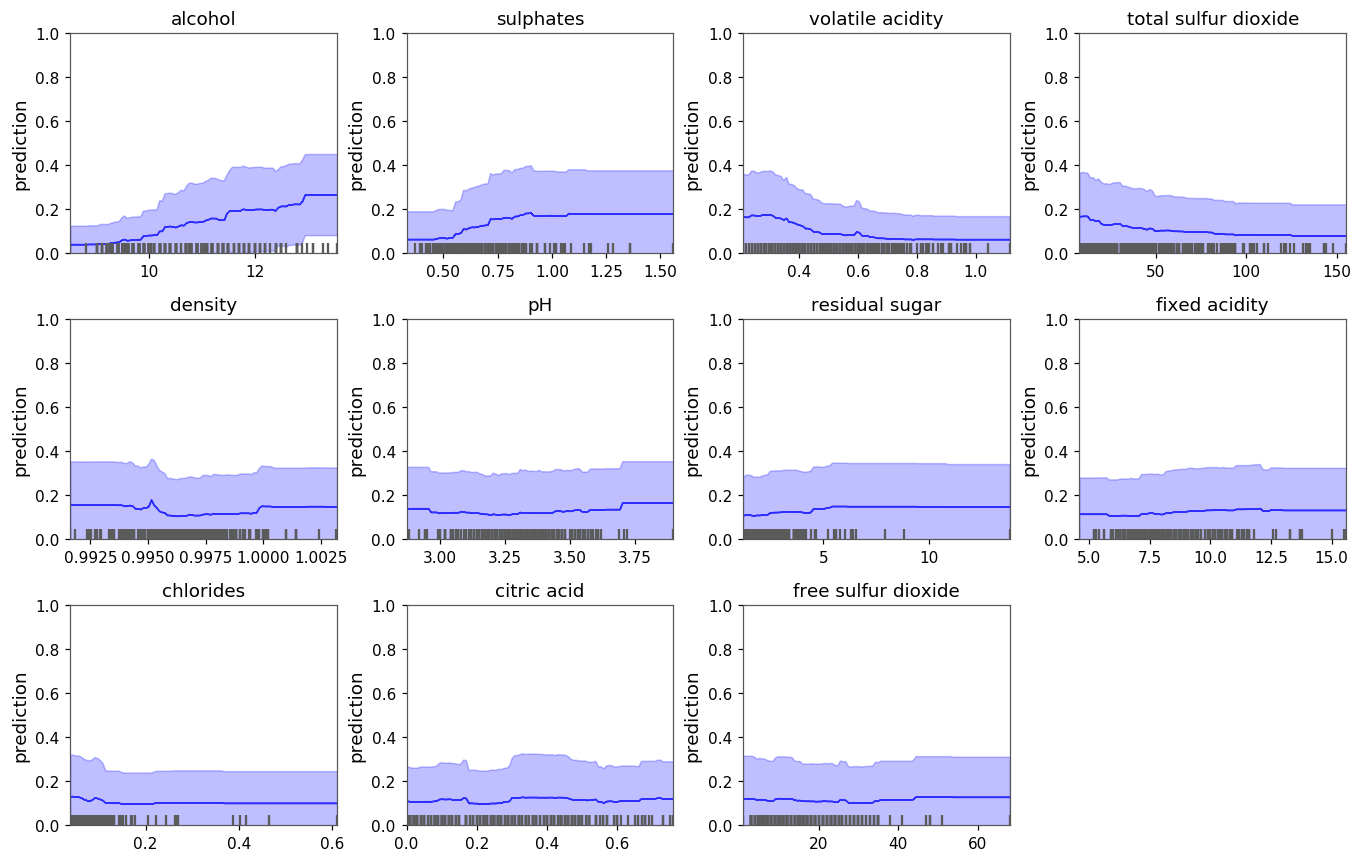

In [43]:
pdp4.plot_multiple(mycols, rug=True, data=xtest)

In [44]:
#the prediction probability remains almost same for residual sugar, fixed acidity, chlorides, citric acid and free sulfur 
#dioxide

In [45]:
class_label[5]

'8'

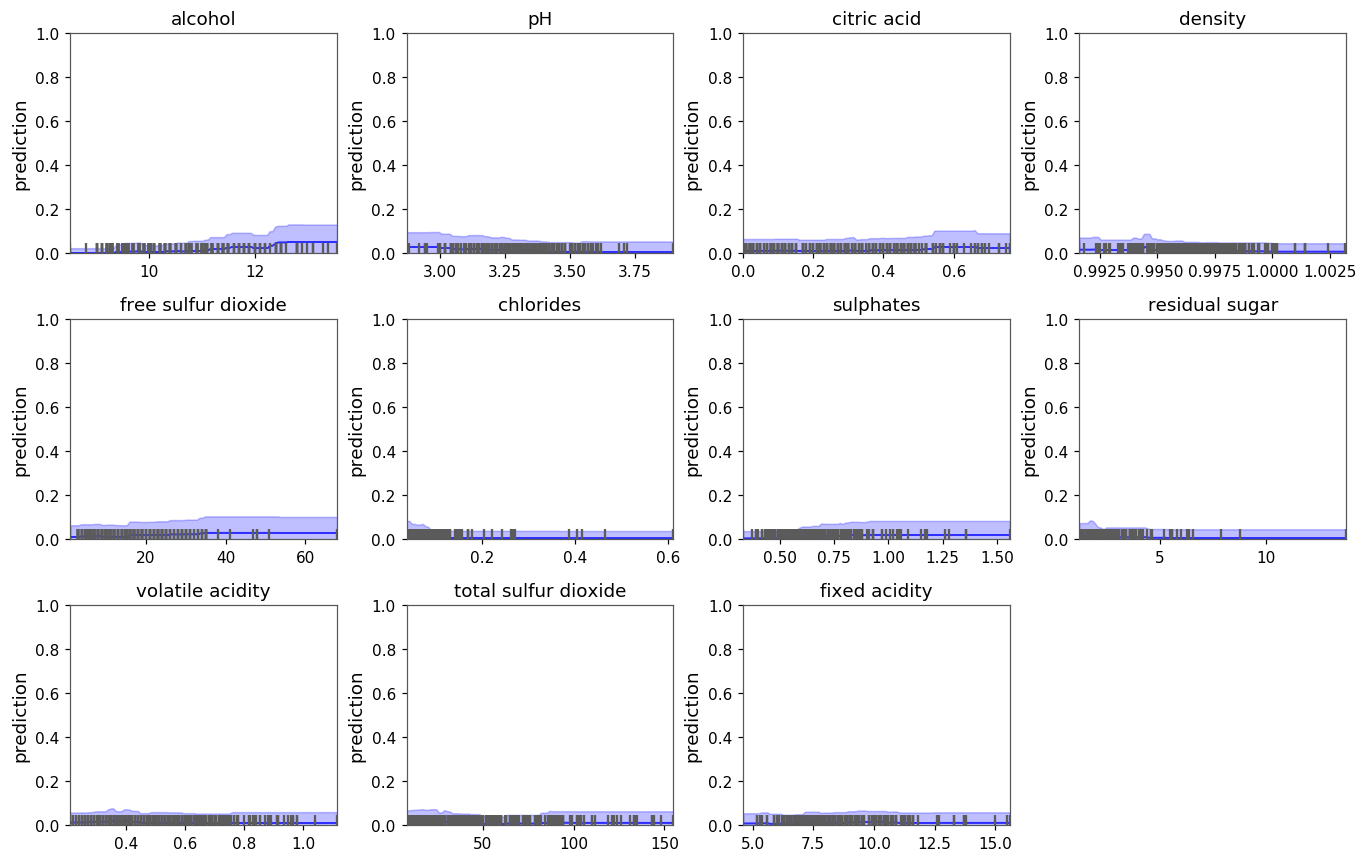

In [47]:
pdp11 = pdp_plot.PartialDependence(xtest, rf, class_label, class_label[5])
pdp11.plot_multiple(mycols, rug=True, data=xtest)

In [48]:
#Trying with gradient boosting classifier 

In [51]:
gbc = GradientBoostingClassifier()
gbc.fit(xtrain, ytrain)
pred_gbc = gbc.predict(xtest)
print(classification_report(ytest,pred_gbc))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.50      0.14      0.22        14
           5       0.67      0.75      0.71       130
           6       0.64      0.69      0.66       128
           7       0.67      0.52      0.59        42
           8       0.00      0.00      0.00         3

    accuracy                           0.65       320
   macro avg       0.41      0.35      0.36       320
weighted avg       0.64      0.65      0.64       320



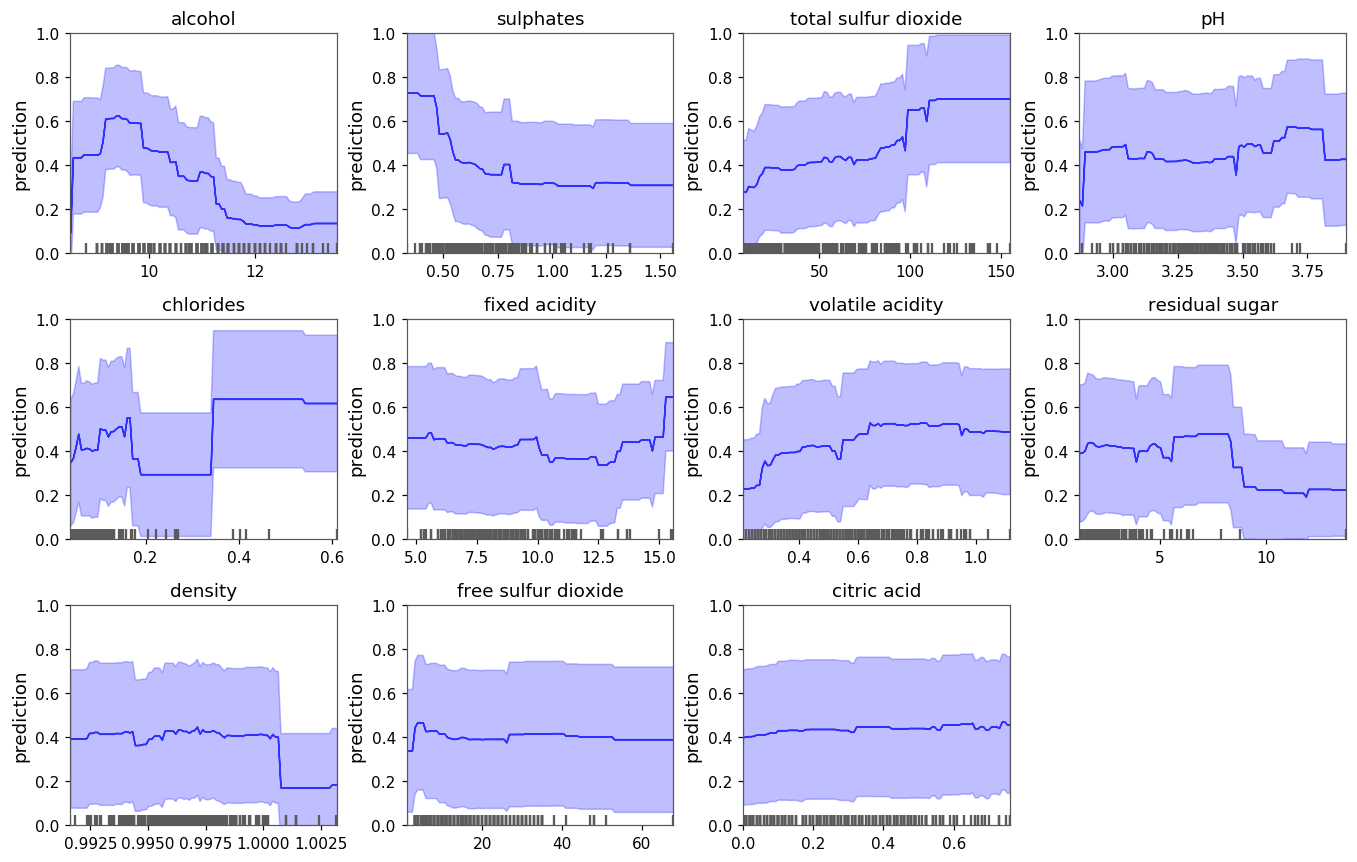

In [52]:
pdp10 = pdp_plot.PartialDependence(xtest, gbc, list(gbc.classes_), list(gbc.classes_)[2])
pdp10.plot_multiple(mycols, rug=True, data=xtest)

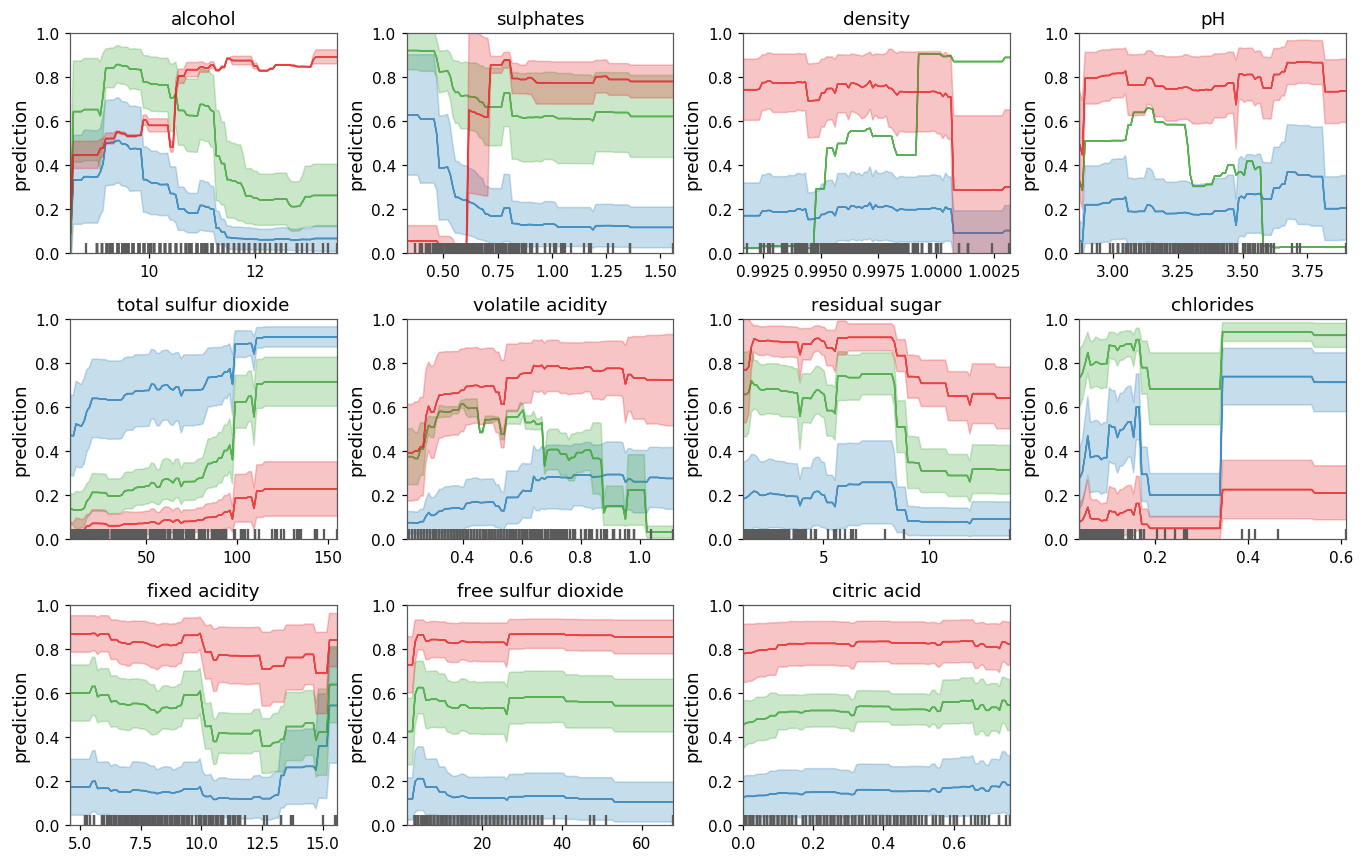

In [53]:
pdp10 = pdp_plot.PartialDependence(xtest, gbc, list(gbc.classes_), list(gbc.classes_)[2])
pdp10.plot_multiple(mycols, rug=True, data=xtest, compute_clusters=True, n_clusters=3)

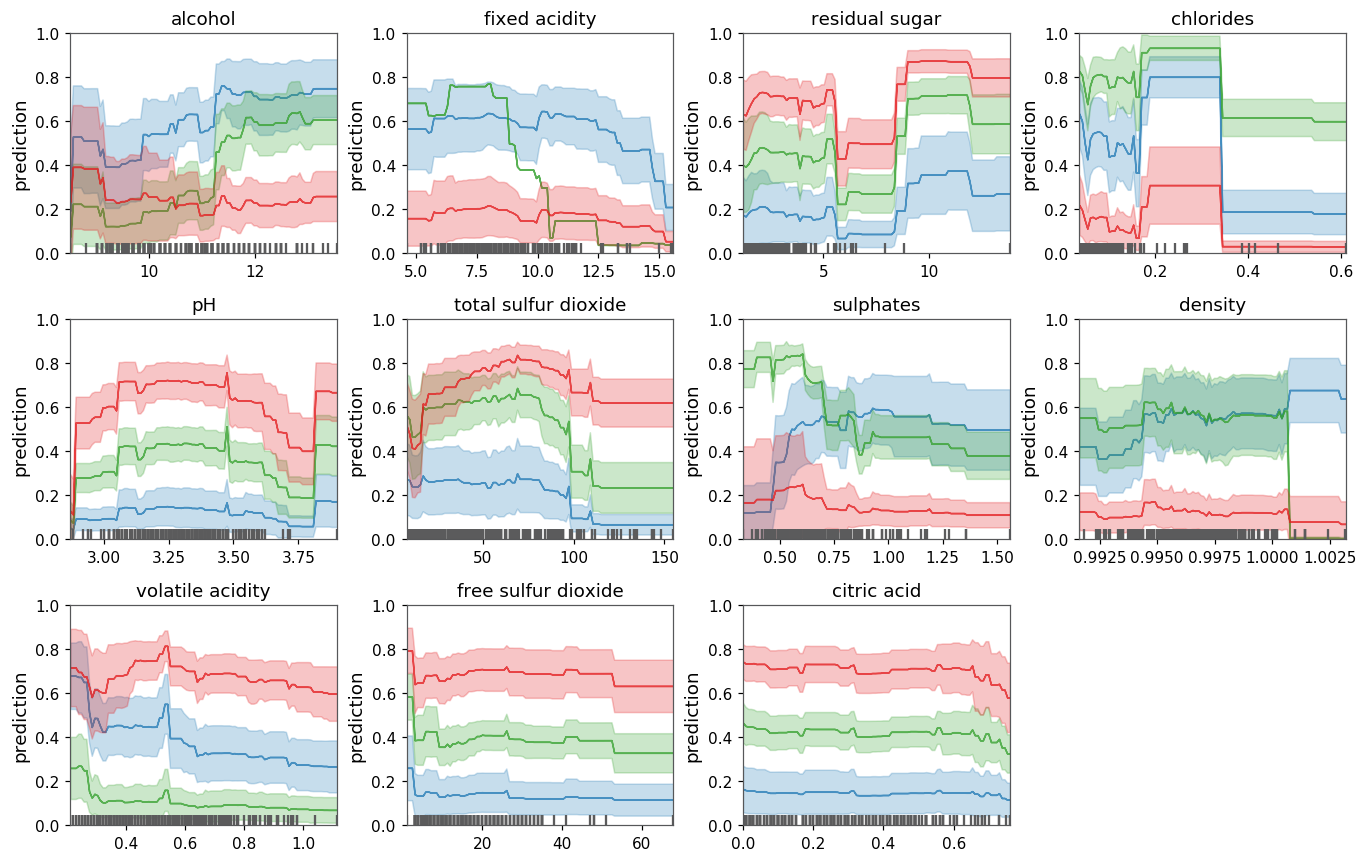

In [54]:
pdp10 = pdp_plot.PartialDependence(xtest, gbc, list(gbc.classes_), list(gbc.classes_)[3])
pdp10.plot_multiple(mycols, rug=True, data=xtest, compute_clusters=True, n_clusters=3)

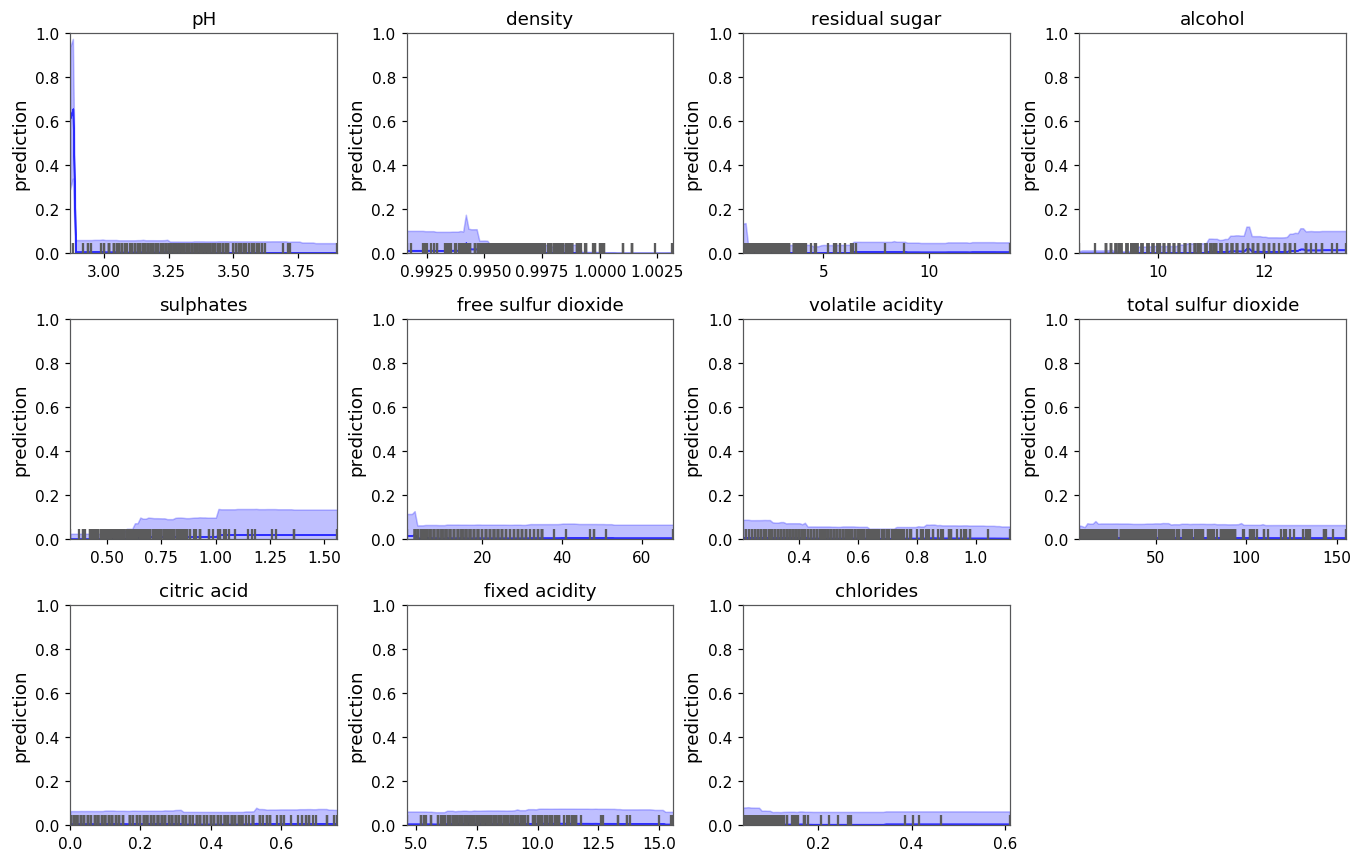

In [55]:
pdp10 = pdp_plot.PartialDependence(xtest, gbc, list(gbc.classes_), list(gbc.classes_)[5])
pdp10.plot_multiple(mycols, rug=True, data=xtest)

In [60]:
#Trying with Decision Tree Classifier

In [61]:
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
pred_dt = dt.predict(xtest)
print(classification_report(ytest,pred_dt))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.08      0.07      0.08        14
           5       0.68      0.71      0.69       130
           6       0.64      0.66      0.65       128
           7       0.62      0.50      0.55        42
           8       0.00      0.00      0.00         3

    accuracy                           0.62       320
   macro avg       0.34      0.32      0.33       320
weighted avg       0.62      0.62      0.62       320



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.


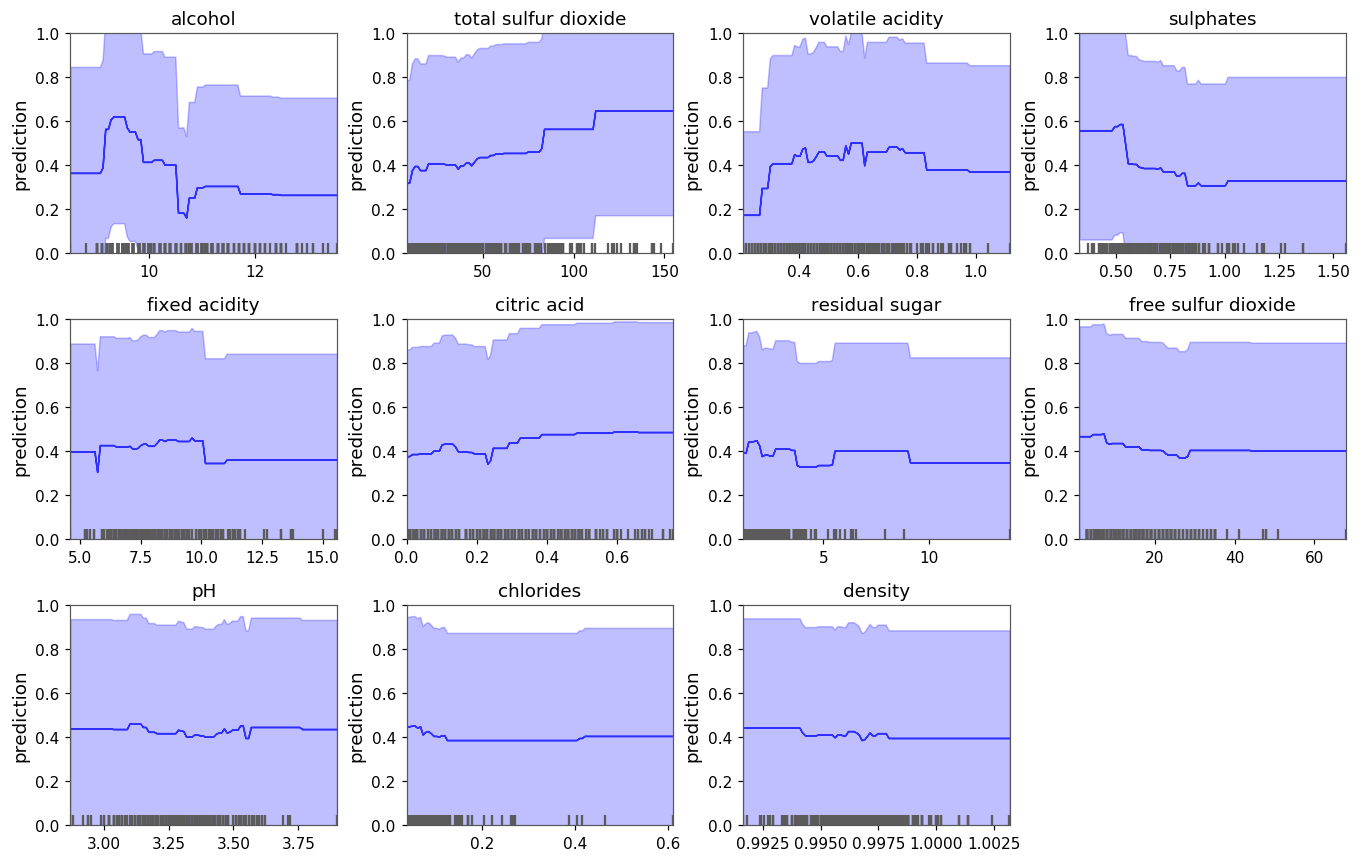

In [63]:
pdp11 = pdp_plot.PartialDependence(xtest, dt, list(dt.classes_), list(dt.classes_)[2])
pdp11.plot_multiple(mycols, rug=True, data=xtest)

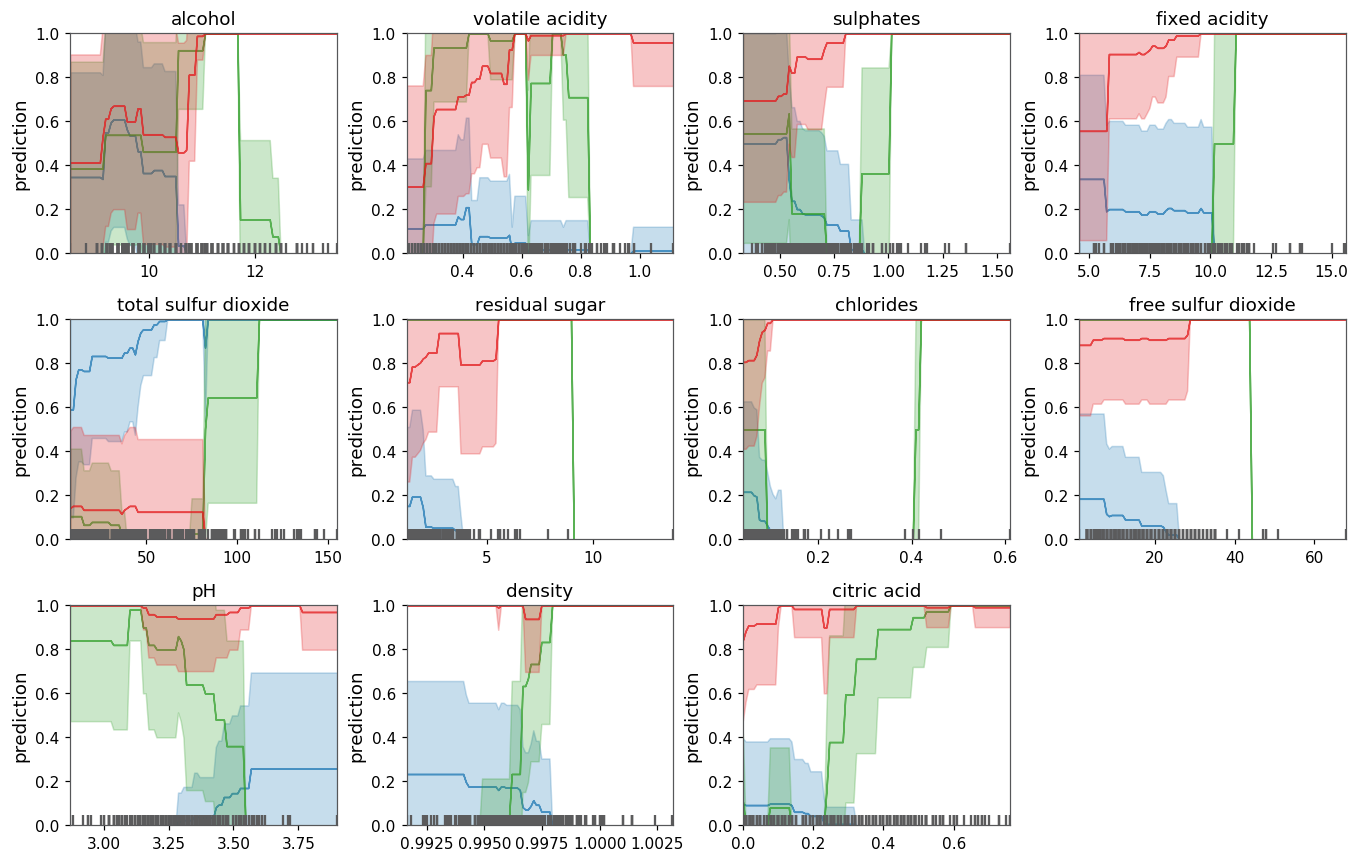

In [62]:
pdp11 = pdp_plot.PartialDependence(xtest, dt, list(dt.classes_), list(dt.classes_)[2])
pdp11.plot_multiple(mycols, rug=True, data=xtest, compute_clusters=True, n_clusters=3)

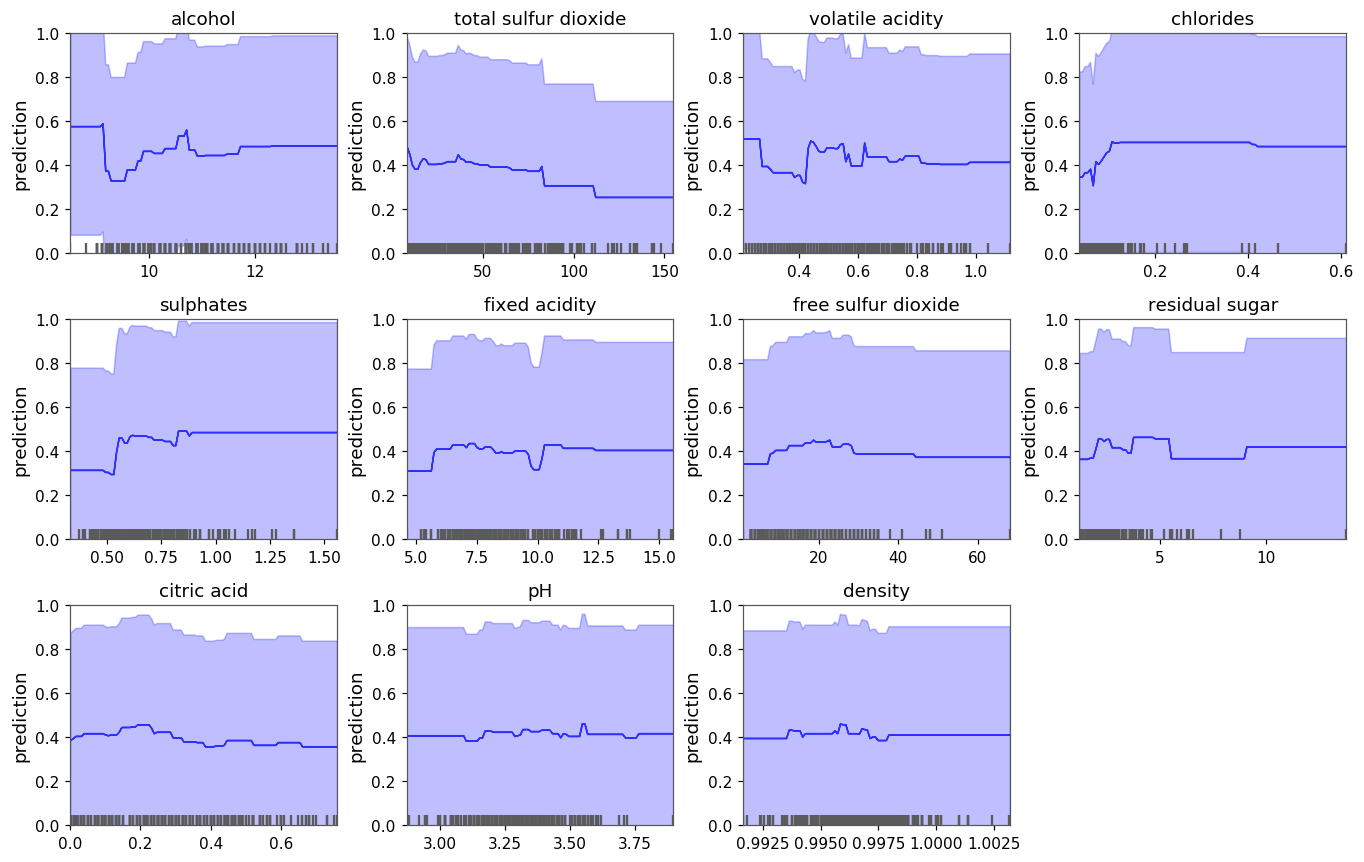

In [64]:
pdp11 = pdp_plot.PartialDependence(xtest, dt, list(dt.classes_), list(dt.classes_)[3])
pdp11.plot_multiple(mycols, rug=True, data=xtest)

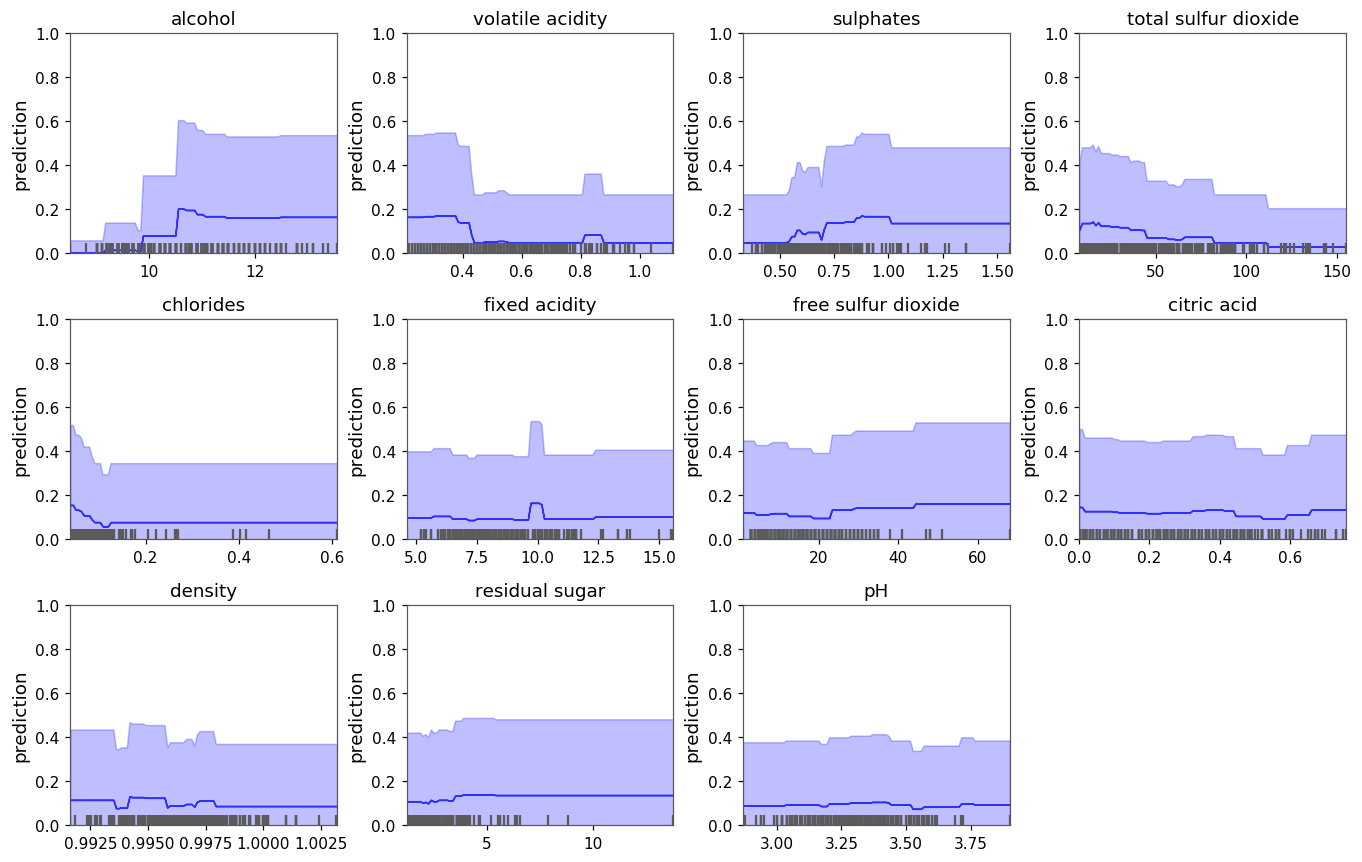

In [65]:
pdp11 = pdp_plot.PartialDependence(xtest, dt, list(dt.classes_), list(dt.classes_)[4])
pdp11.plot_multiple(mycols, rug=True, data=xtest)

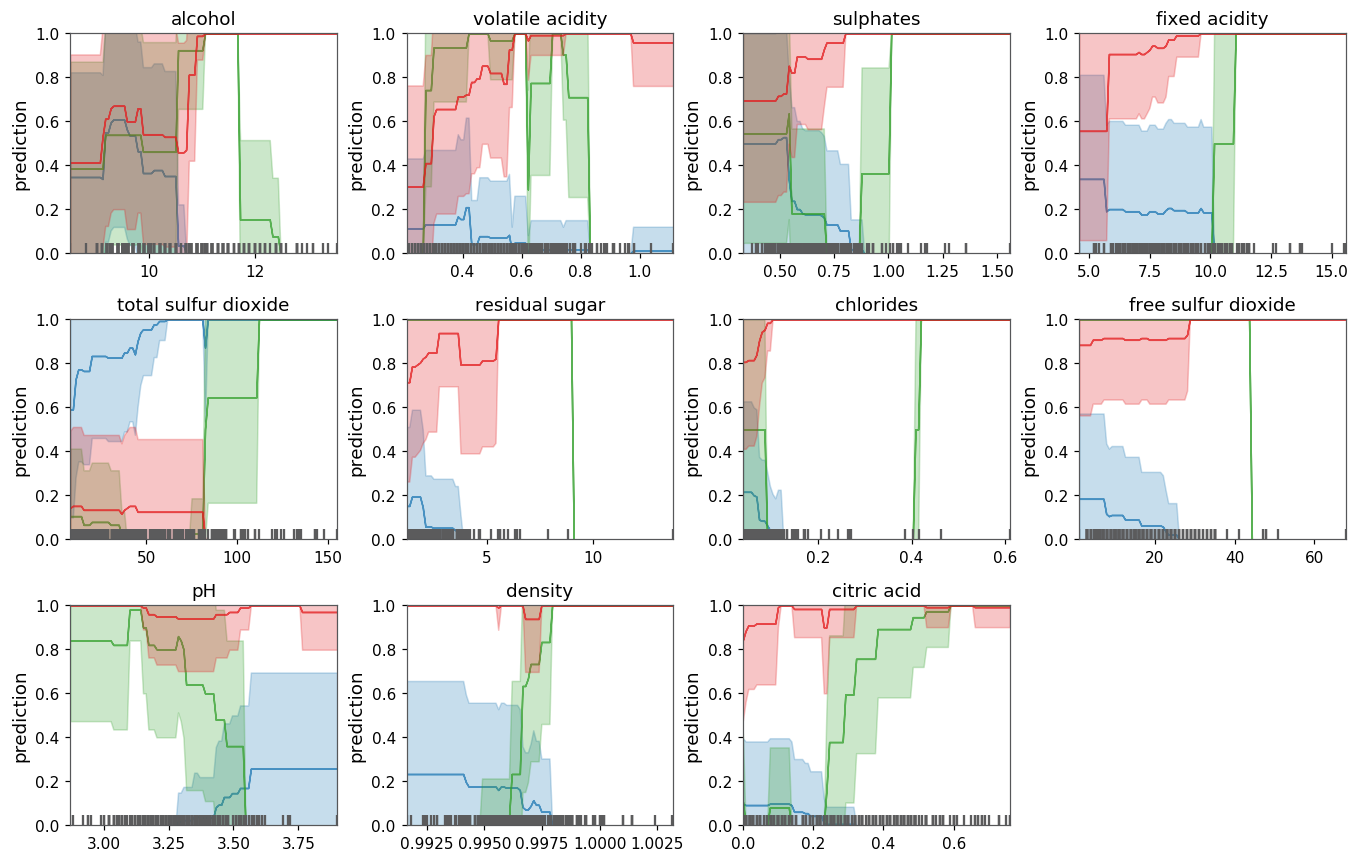

In [66]:
pdp11 = pdp_plot.PartialDependence(xtest, dt, list(dt.classes_), list(dt.classes_)[2])
pdp11.plot_multiple(mycols, rug=True, data=xtest, compute_clusters=True, n_clusters=3)

In [67]:
#Trying with a subset of features

In [68]:
X2 = df.drop(['free sulfur dioxide', 'residual sugar', 'chlorides', 'citric acid', 'pH'], axis=1)

In [69]:
xtrain, xtest, ytrain, ytest = train_test_split(X2, Y, test_size=0.2)

In [70]:
rf2 = RandomForestClassifier()
rf2.fit(xtrain, ytrain)
pred = rf2.predict(xtest)
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        14
           5       0.69      0.81      0.74       134
           6       0.69      0.67      0.68       129
           7       0.73      0.59      0.66        37
           8       0.00      0.00      0.00         3

    accuracy                           0.68       320
   macro avg       0.35      0.35      0.35       320
weighted avg       0.65      0.68      0.66       320



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.


In [71]:
mycol2 = list(X2.columns)

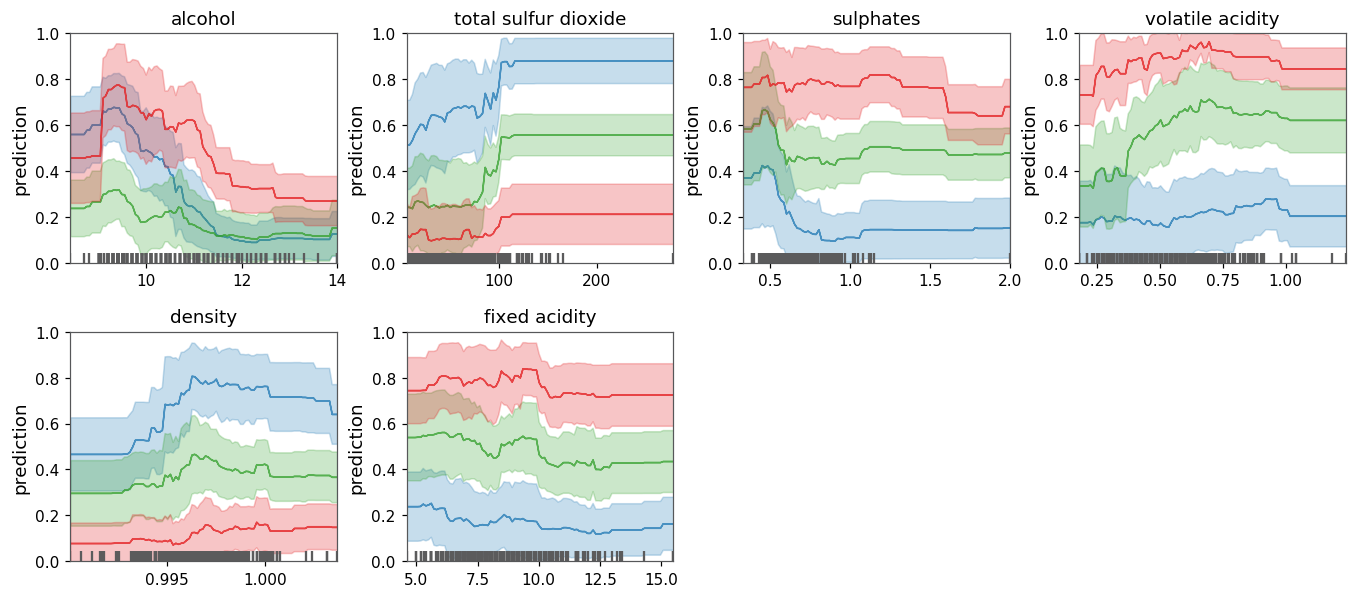

In [77]:
pdp12 = pdp_plot.PartialDependence(xtest, rf2, list(rf2.classes_), list(rf2.classes_)[2])
pdp12.plot_multiple(mycol2, rug=True, data=xtest, compute_clusters=True, n_clusters=3)

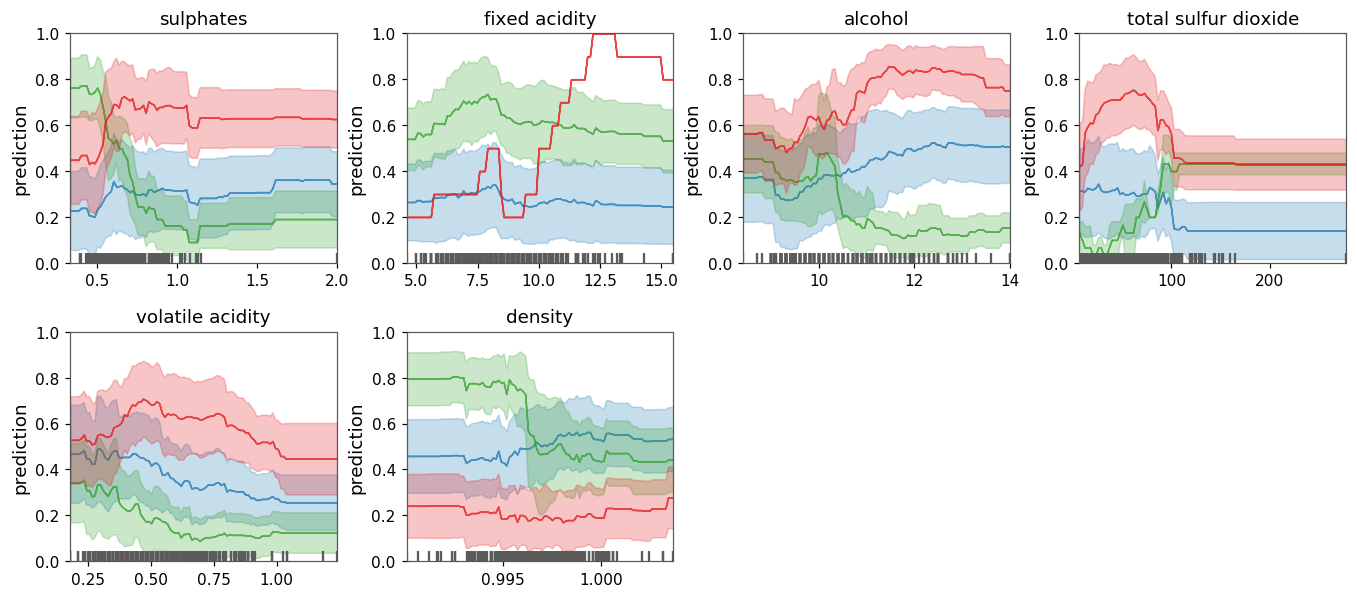

In [78]:
pdp12 = pdp_plot.PartialDependence(xtest, rf2, list(rf2.classes_), list(rf2.classes_)[3])
pdp12.plot_multiple(mycol2, rug=True, data=xtest, compute_clusters=True, n_clusters=3)

In [79]:
class_label[5]

'8'

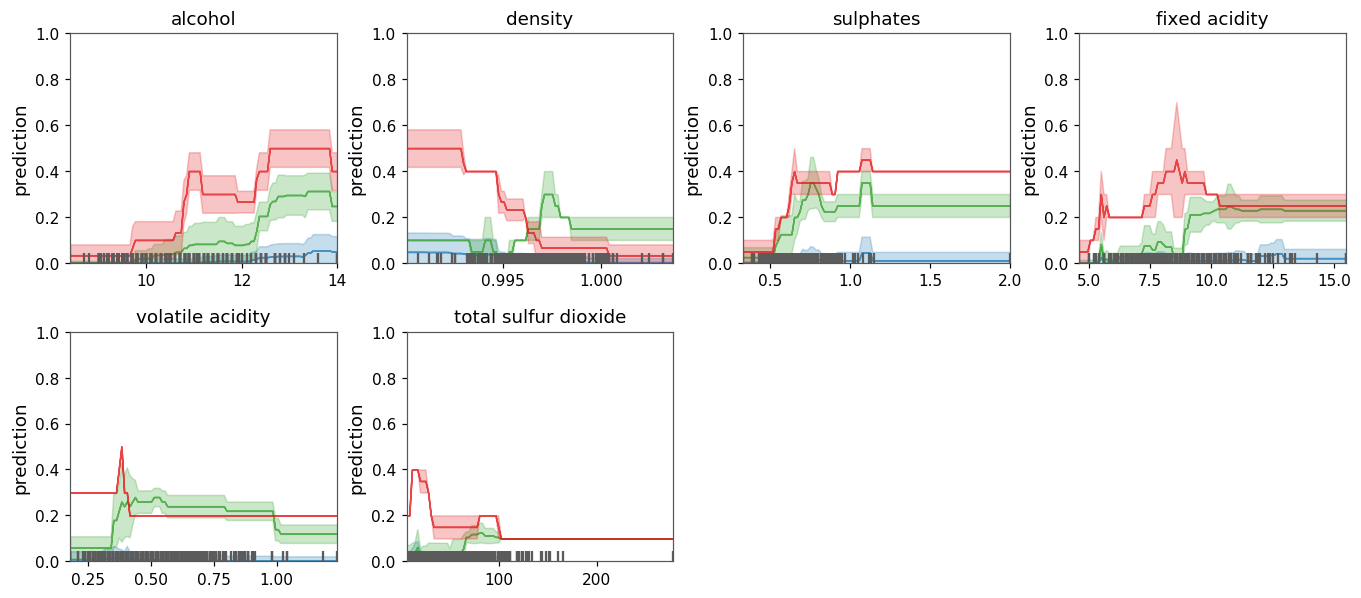

In [80]:
pdp12 = pdp_plot.PartialDependence(xtest, rf2, list(rf2.classes_), list(rf2.classes_)[5])
pdp12.plot_multiple(mycol2, rug=True, data=xtest, compute_clusters=True, n_clusters=3)

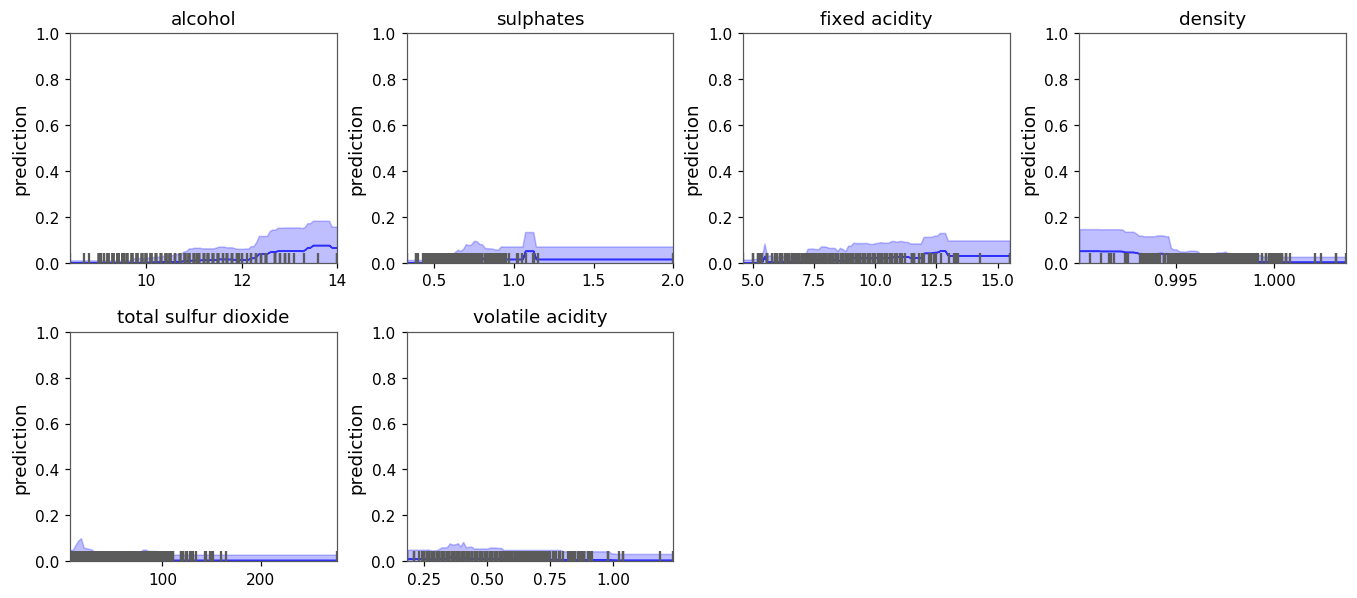

In [81]:
pdp12 = pdp_plot.PartialDependence(xtest, rf2, list(rf2.classes_), list(rf2.classes_)[5])
pdp12.plot_multiple(mycol2, rug=True, data=xtest)

In [82]:
# Changing the quality variable to contain only 3 values

In [83]:
df = pd.read_csv('winequality-red.csv')

In [84]:
reviews = []
for i in df['quality']:
    if i >= 1 and i <= 3:
        reviews.append('1')
    elif i >= 4 and i <= 7:
        reviews.append('2')
    elif i >= 8 and i <= 10:
        reviews.append('3')
df['Reviews'] = reviews

In [85]:
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality Reviews  
0         9.4        5       2  
1         9.8        5       2  
2         9.8        5       2  
3         9.8        6       2  
4         9.4        5       2  
...       ...      ...     ...  
1594     10.5        5       2  
1595     11.2        6       2  
1596     11.0        6       2  
1597     10.2        5       2  
1598     11.0        6       2  

[1599 rows x 13 columns]

In [86]:
df.pop('quality')
Y = df.pop('Reviews')
X = df

In [87]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2)

In [88]:
rf3 = RandomForestClassifier()
rf3.fit(xtrain, ytrain)
pred_rf3 = rf3.predict(xtest)
print(classification_report(ytest, pred_rf3))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.99      1.00      1.00       316
           3       1.00      0.50      0.67         2

    accuracy                           0.99       320
   macro avg       0.66      0.50      0.55       320
weighted avg       0.98      0.99      0.99       320



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.


In [89]:
mycol = list(xtest.columns)

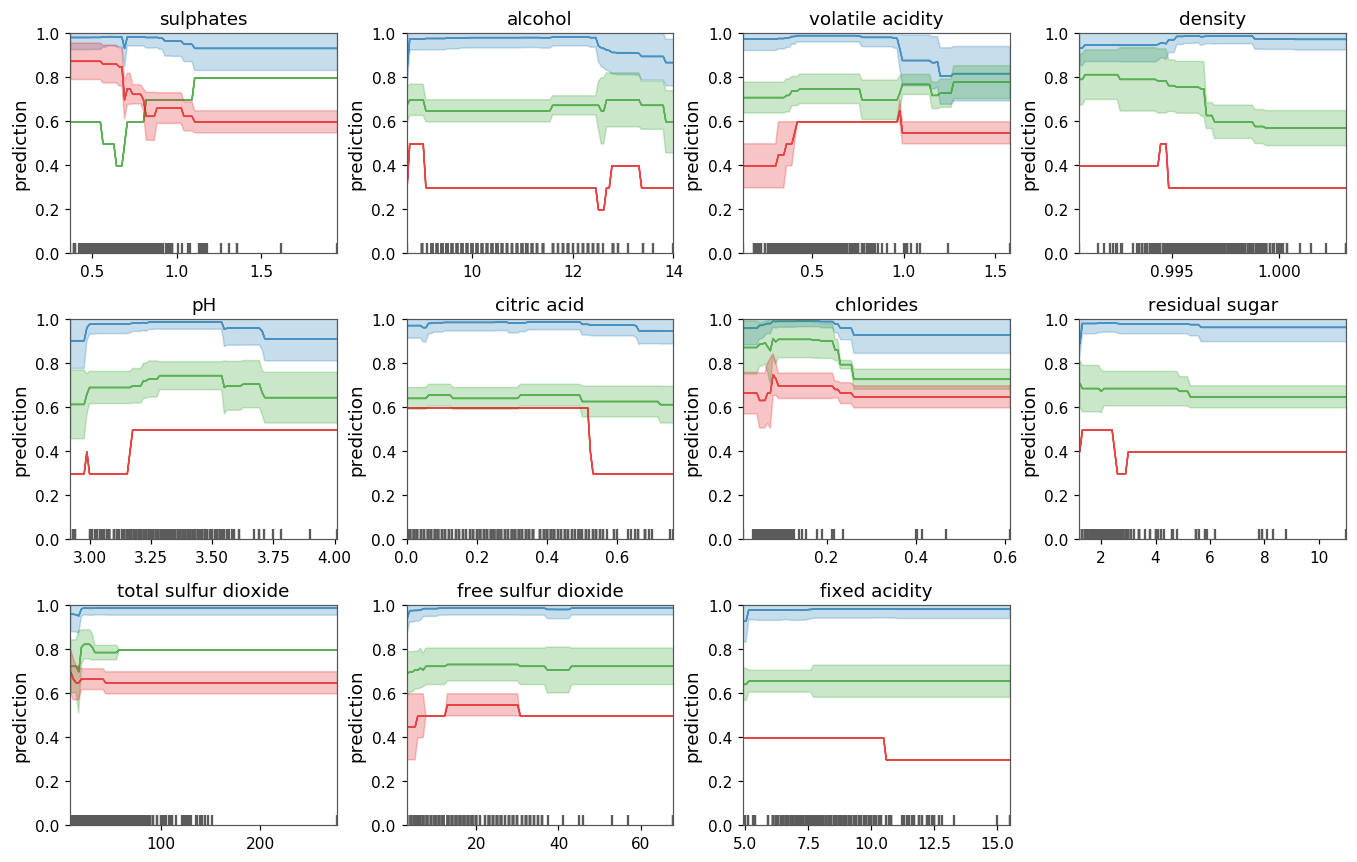

In [90]:
pdp13 = pdp_plot.PartialDependence(xtest, rf3, list(rf3.classes_), list(rf3.classes_)[1])
pdp13.plot_multiple(mycol, rug=True, data=xtest, compute_clusters=True, n_clusters=3)

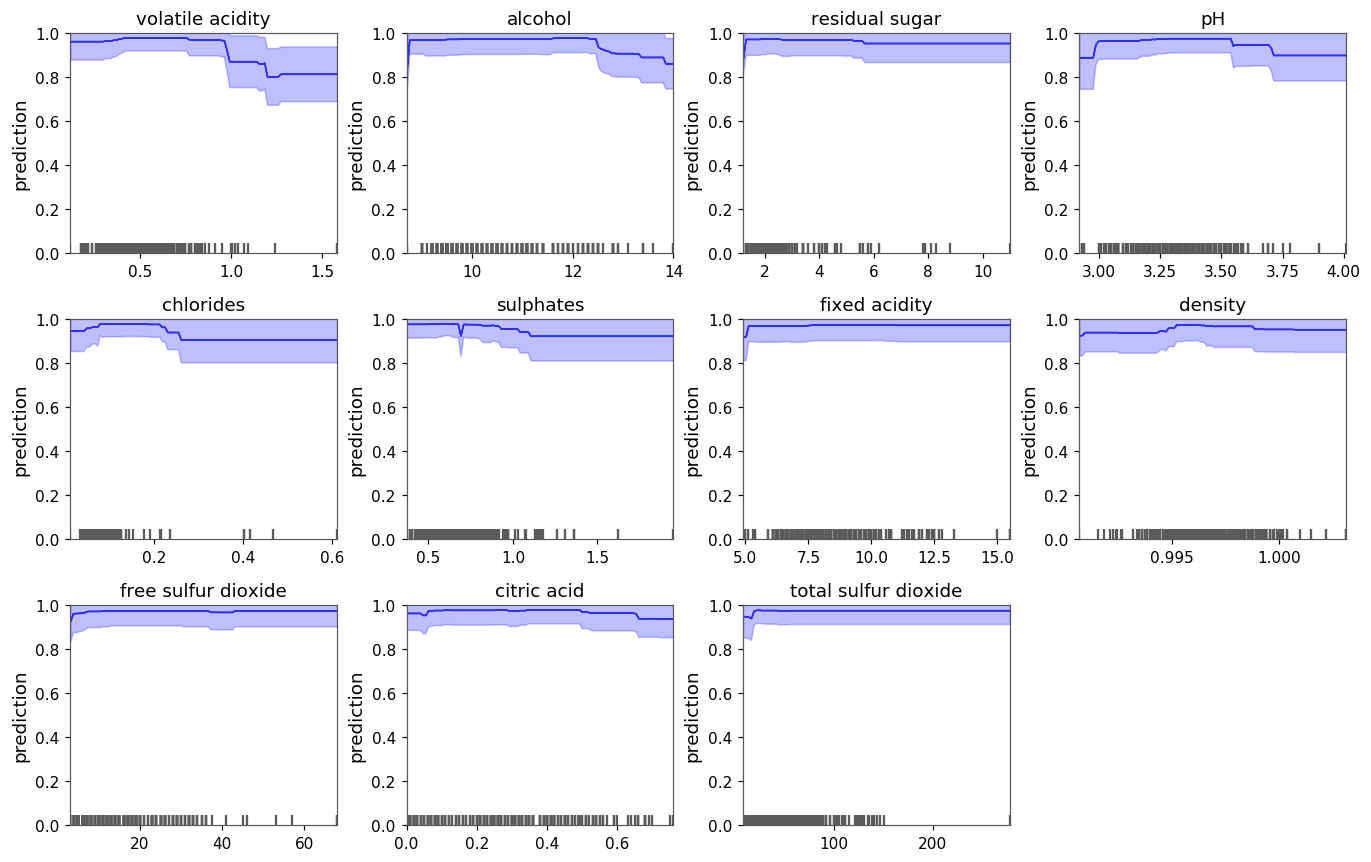

In [91]:
pdp13.plot_multiple(mycol, rug=True, data=xtest)

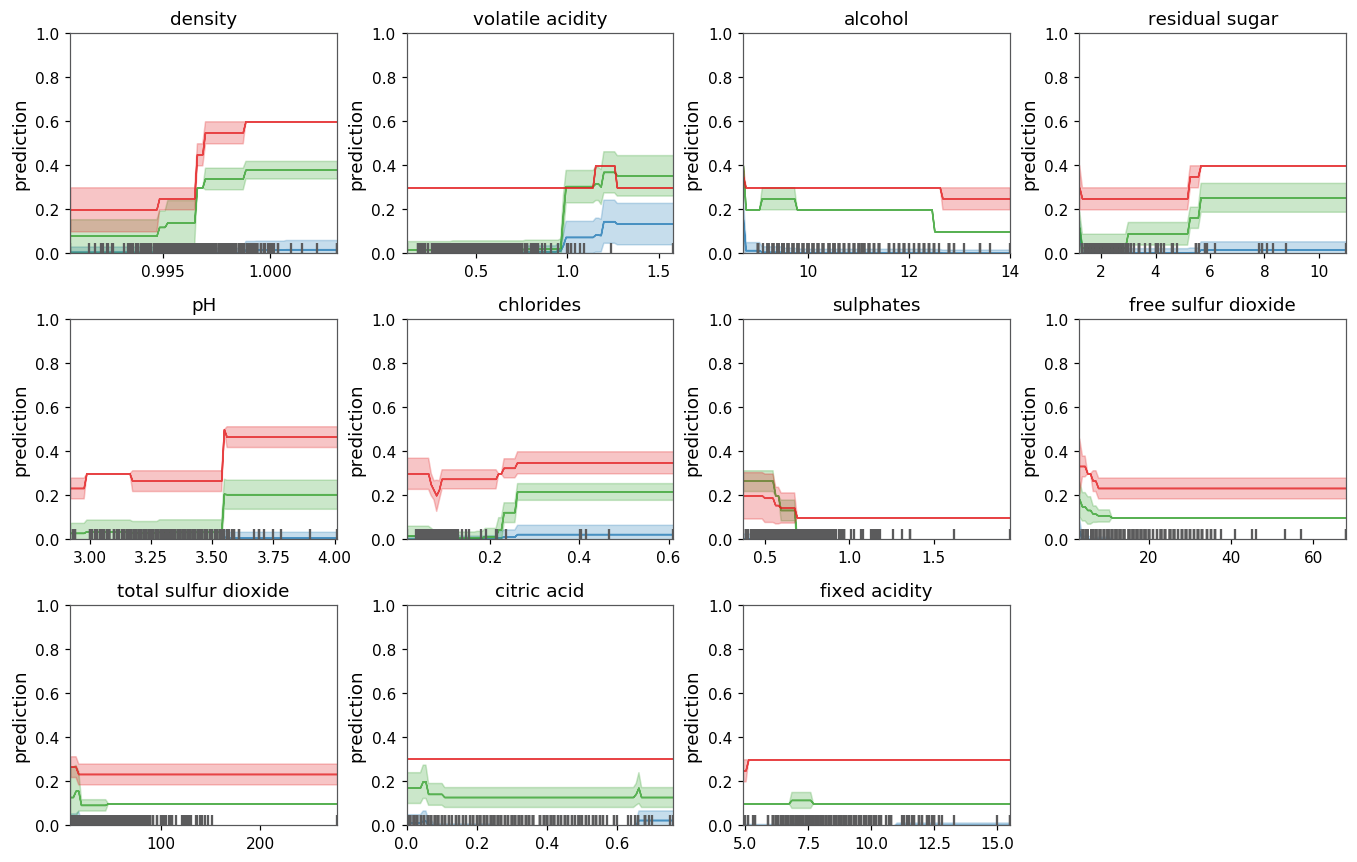

In [92]:
pdp13 = pdp_plot.PartialDependence(xtest, rf3, list(rf3.classes_), list(rf3.classes_)[0])
pdp13.plot_multiple(mycol, rug=True, data=xtest, compute_clusters=True, n_clusters=3)

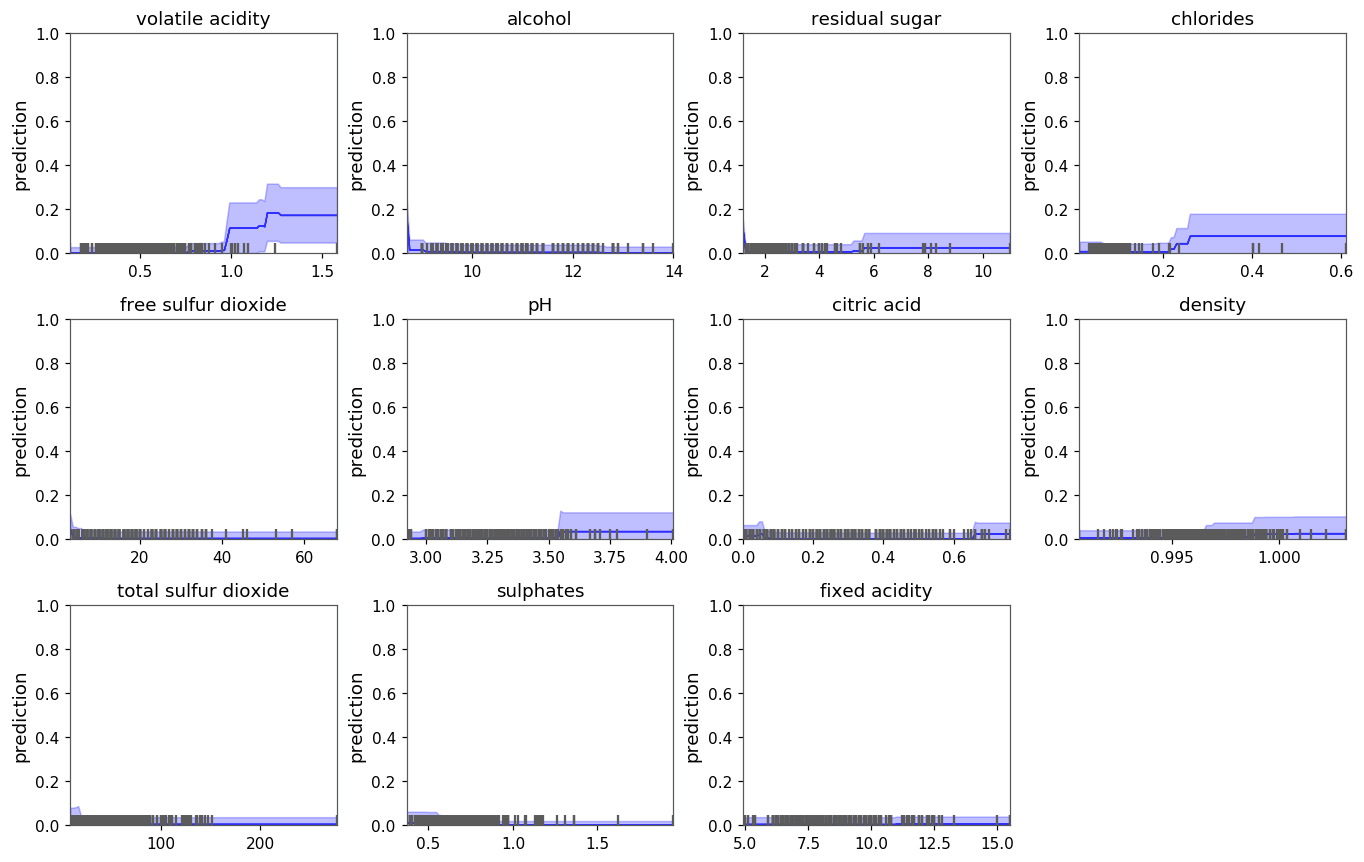

In [94]:
pdp13 = pdp_plot.PartialDependence(xtest, rf3, list(rf3.classes_), list(rf3.classes_)[0])
pdp13.plot_multiple(mycol, rug=True, data=xtest)

# Binning

In [95]:
#Binning for random forest

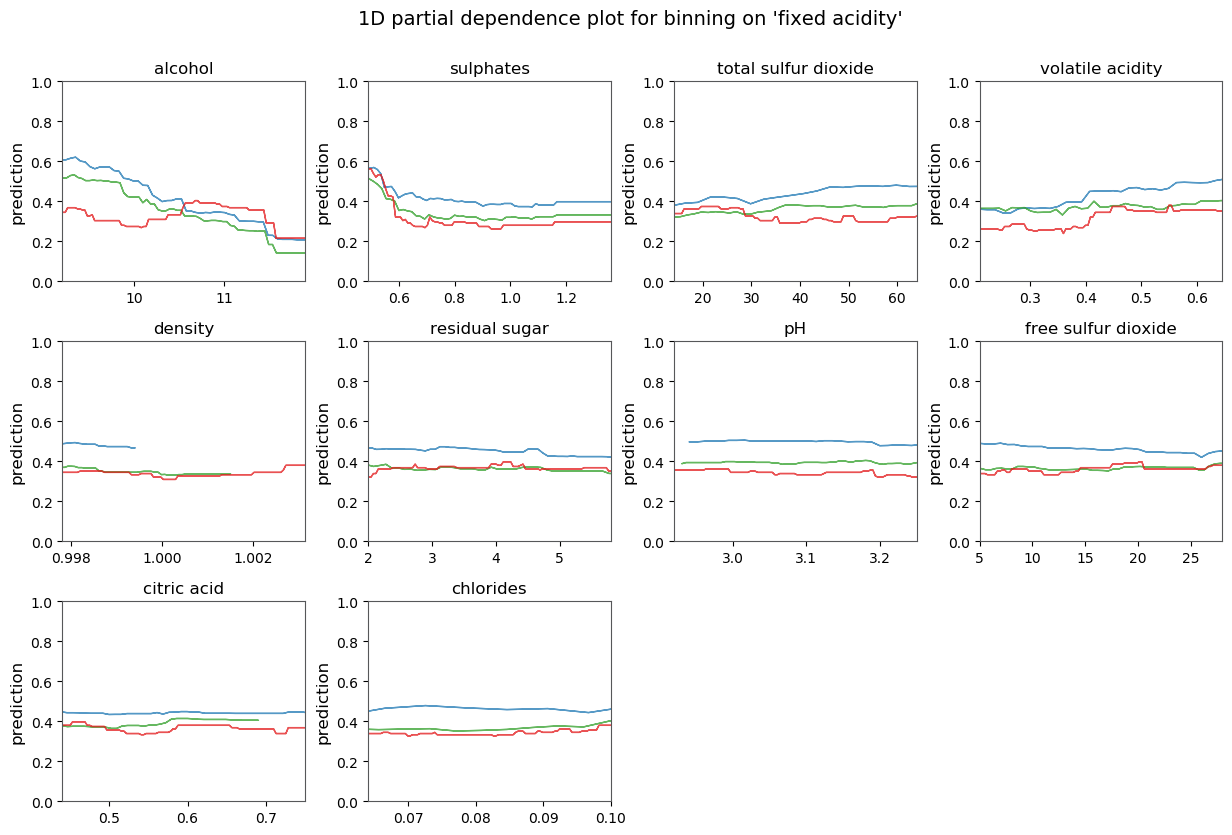

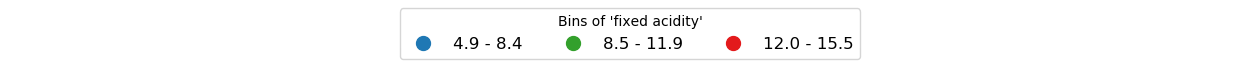

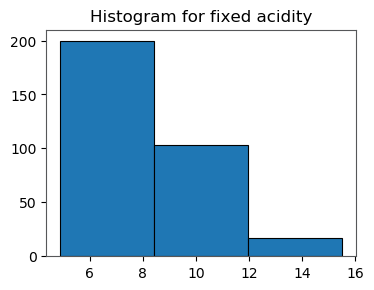

In [96]:
pdp_plot.PartialDependence.plot_binning(xtest, 'fixed acidity', rf, class_label, class_label[2], 3, 10)

In [97]:
pdp_plot.PartialDependence.get_rank_on_binning(xtest, rf, class_label, class_label[2], 3)

The order of columns for 3 bins according to variance in the plots
free sulfur dioxide
citric acid
pH
residual sugar
volatile acidity
fixed acidity
density
sulphates
chlorides
alcohol
total sulfur dioxide


['free sulfur dioxide',
 'citric acid',
 'pH',
 'residual sugar',
 'volatile acidity',
 'fixed acidity',
 'density',
 'sulphates',
 'chlorides',
 'alcohol',
 'total sulfur dioxide']

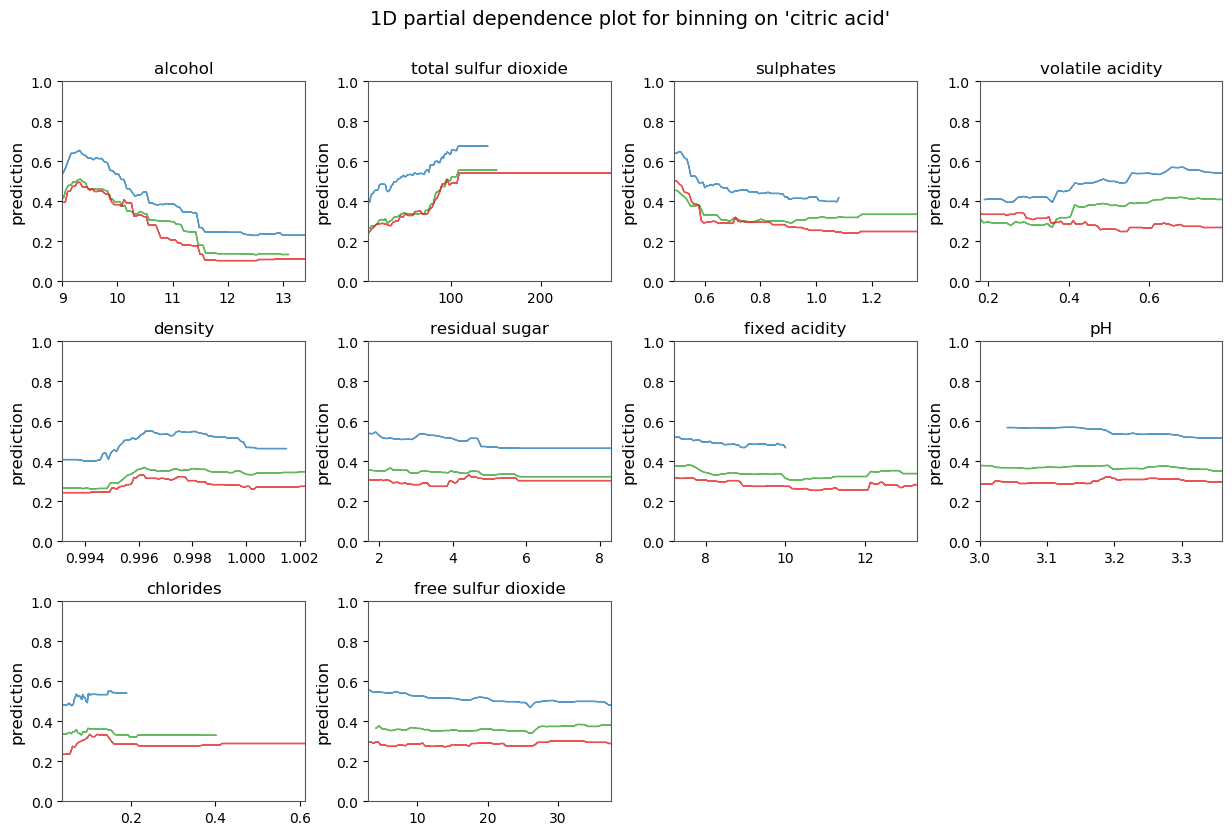

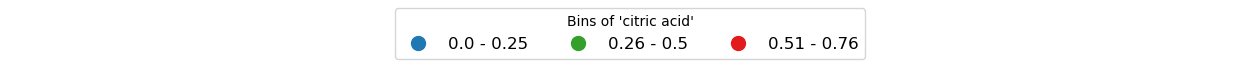

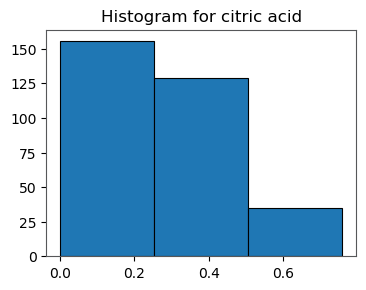

In [99]:
pdp_plot.PartialDependence.plot_binning(xtest, 'citric acid', rf, class_label, class_label[2], 3, 10)

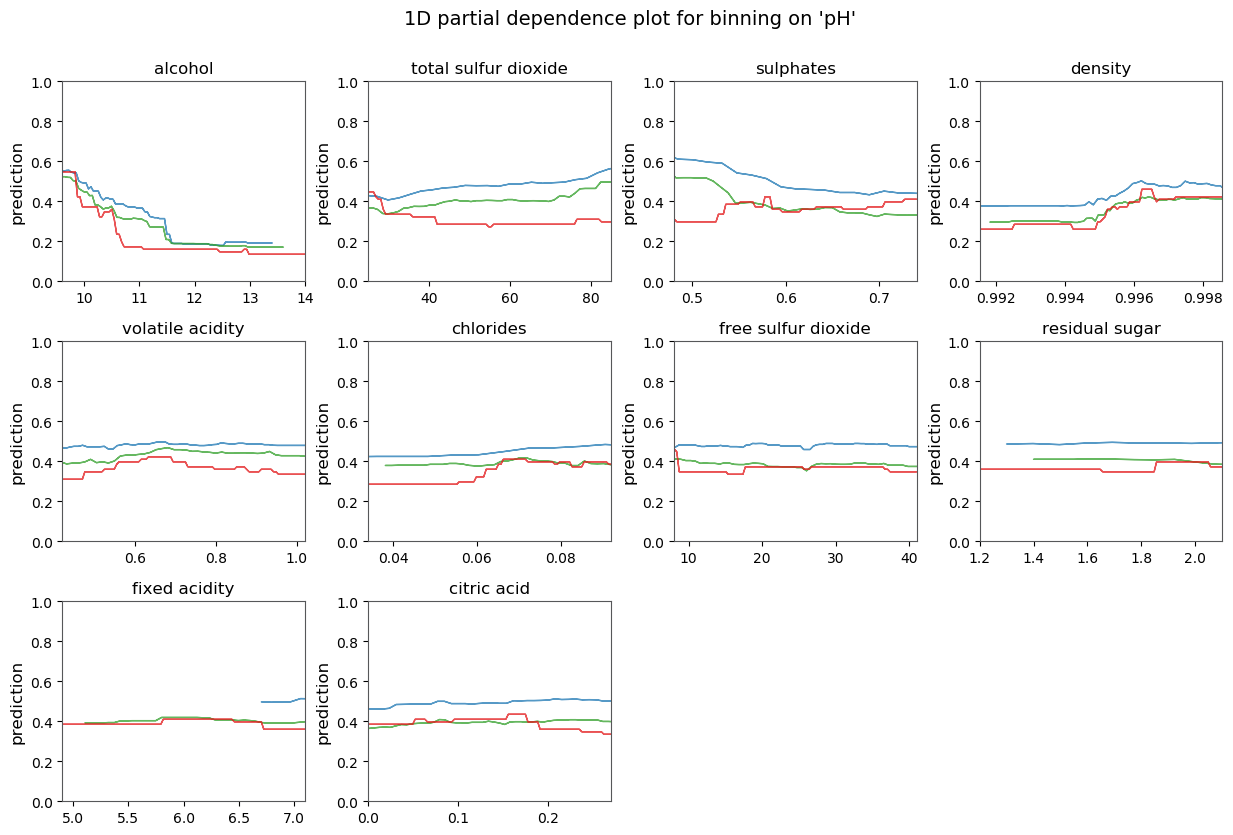

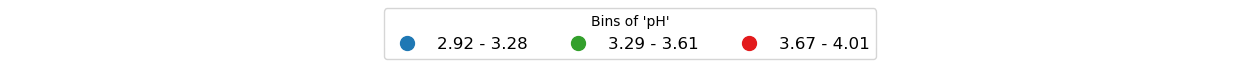

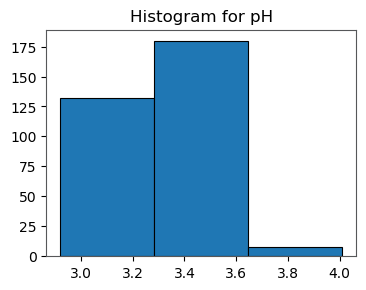

In [100]:
pdp_plot.PartialDependence.plot_binning(xtest, 'pH', rf, class_label, class_label[2], 3, 10)

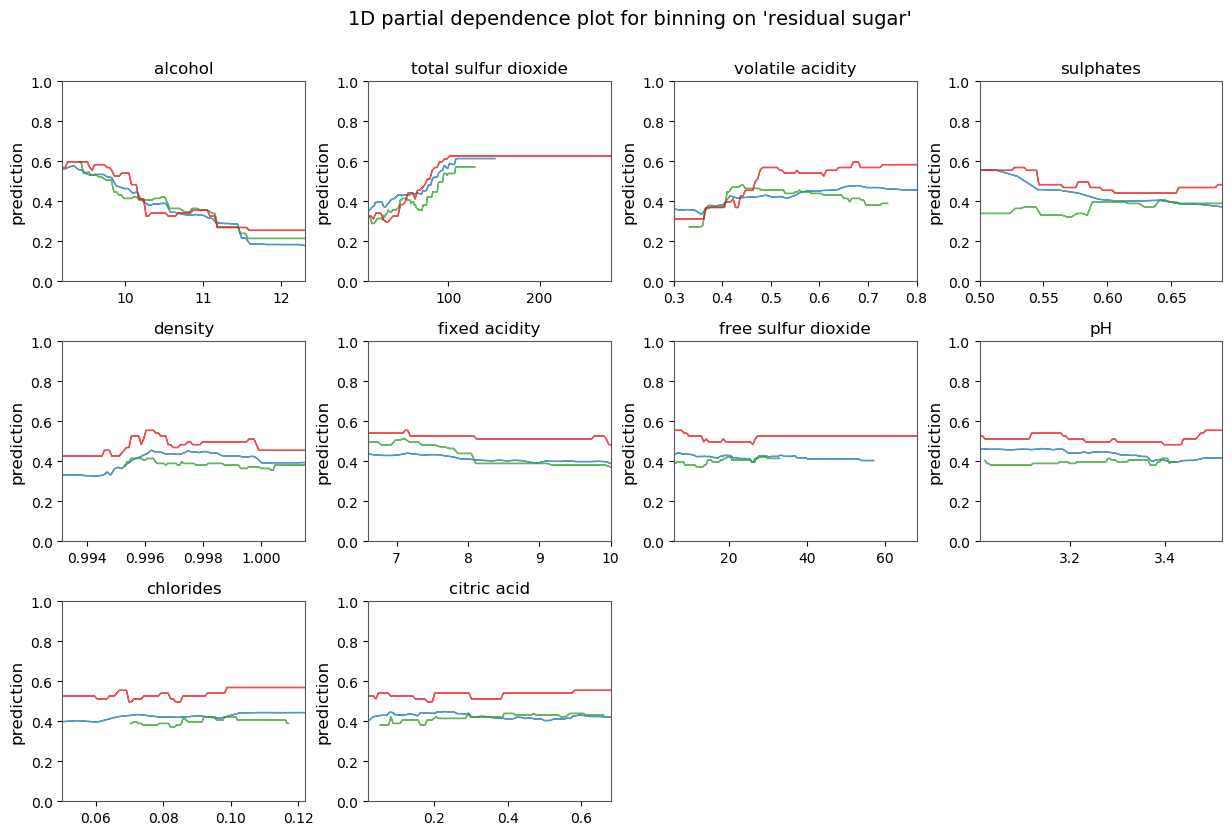

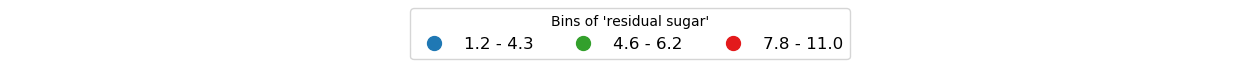

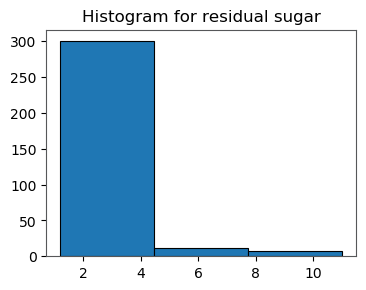

In [101]:
pdp_plot.PartialDependence.plot_binning(xtest, 'residual sugar', rf, class_label, class_label[2], 3, 10)

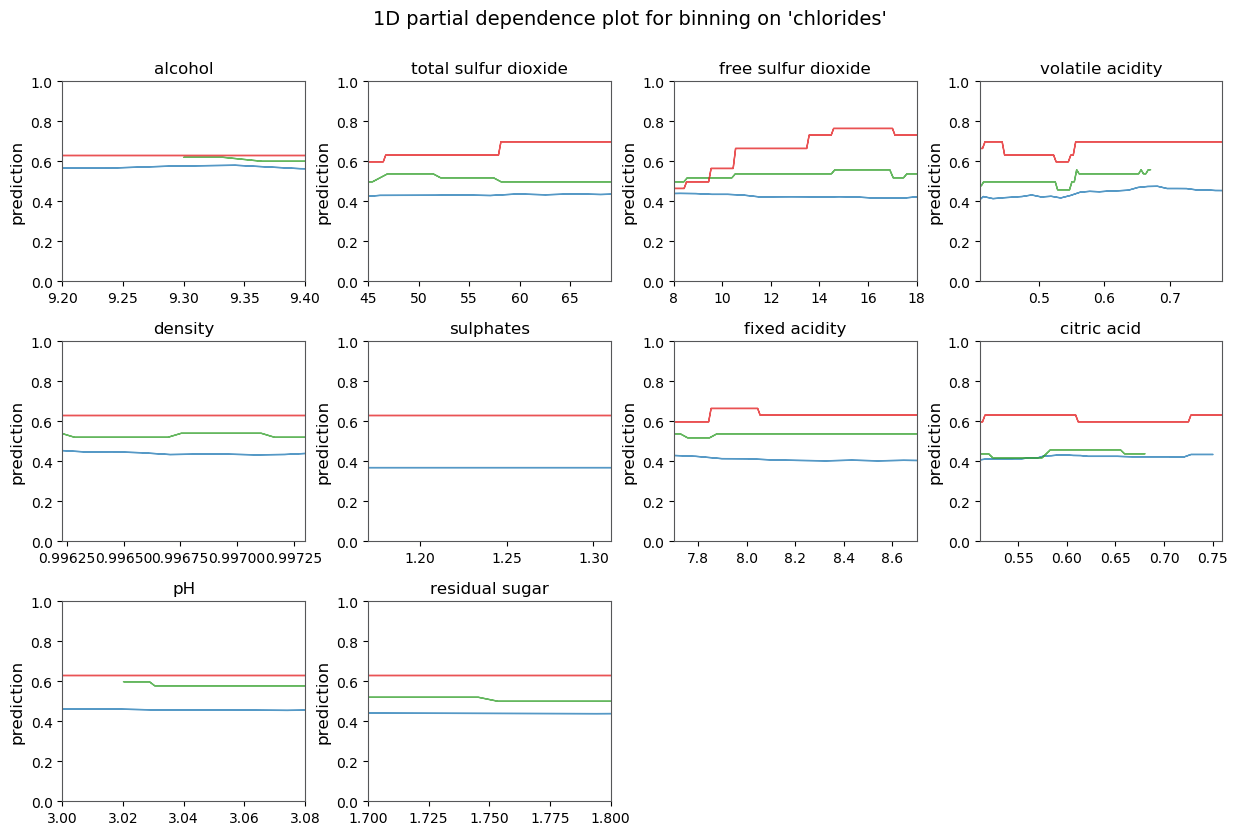

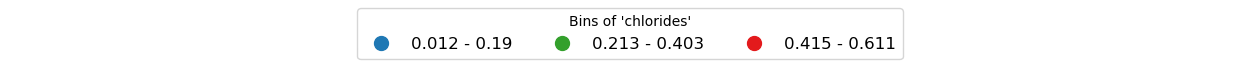

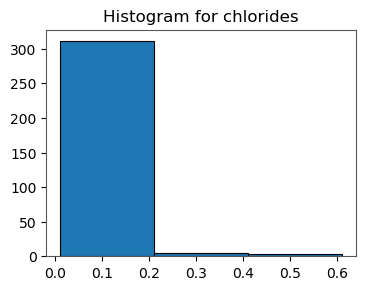

In [102]:
pdp_plot.PartialDependence.plot_binning(xtest, 'chlorides', rf, class_label, class_label[2], 3, 10)

Attempting to set identical left == right == 12.3 results in singular transformations; automatically expanding.
Attempting to set identical left == right == 0.51 results in singular transformations; automatically expanding.
Attempting to set identical left == right == 0.99316 results in singular transformations; automatically expanding.
Attempting to set identical left == right == 0.3 results in singular transformations; automatically expanding.
Attempting to set identical left == right == 3.01 results in singular transformations; automatically expanding.
Attempting to set identical left == right == 8.3 results in singular transformations; automatically expanding.
Attempting to set identical left == right == 0.05 results in singular transformations; automatically expanding.
Attempting to set identical left == right == 7.9 results in singular transformations; automatically expanding.
Attempting to set identical left == right == 37.5 results in singular transformations; automatically exp

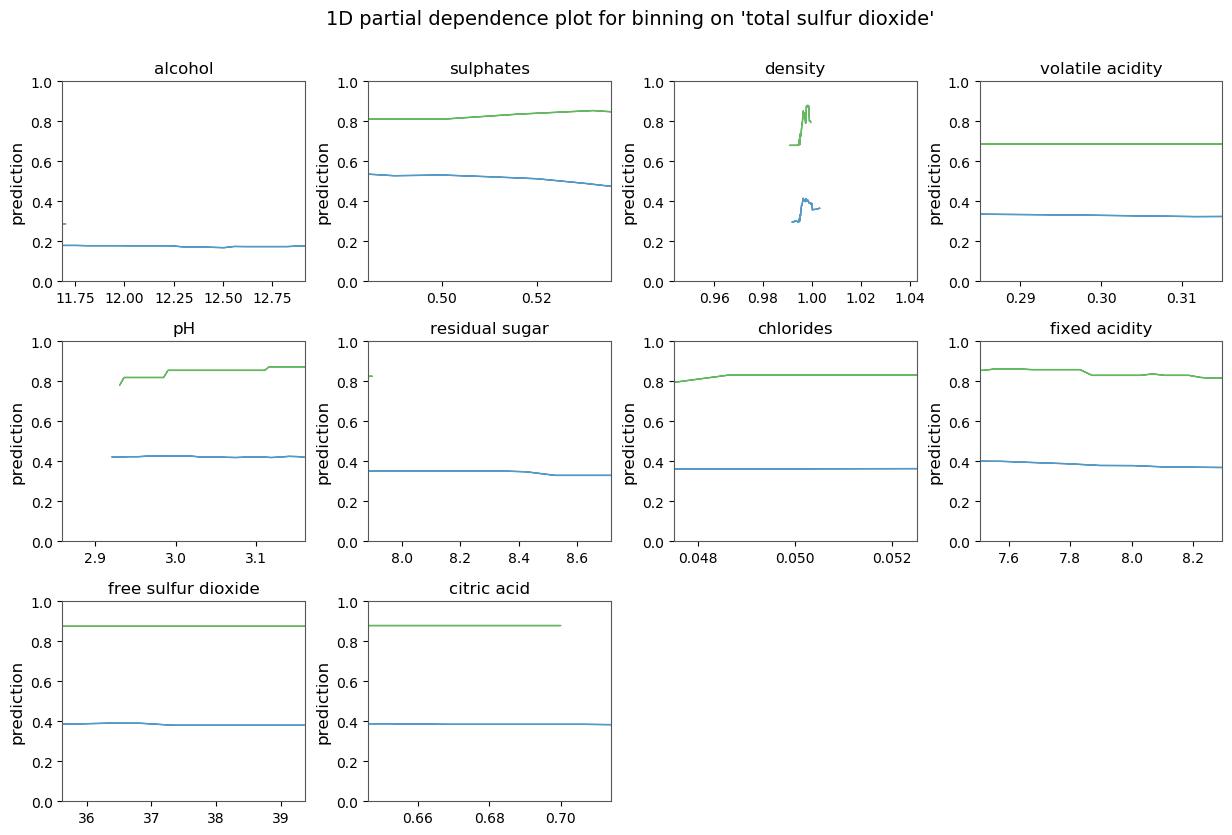

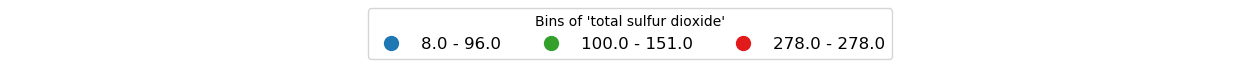

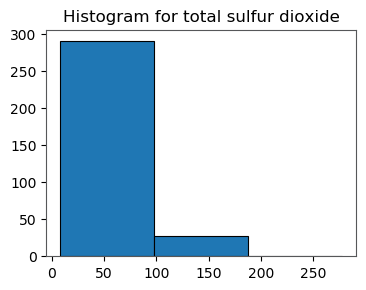

In [105]:
pdp_plot.PartialDependence.plot_binning(xtest, 'total sulfur dioxide', rf, class_label, class_label[2], 3, 10)